# **Human Action Recognition on HMDB-51**

This project was developed by Aurora Castelnovo (matricola 864811) and Nicole Gemelli (matricola 880002) as part of a study on video classification techniques.

The main objective is to build and evaluate deep learning models capable of classifying short video clips based on the type of human action they contain. The dataset used for this task is HMDB-51, a widely adopted benchmark in the field of human action recognition. It contains over 7,000 videos divided into 51 different action classes, such as running, jumping, waving, and more.

Through this project, we explore various model architectures and training strategies — including CNNs, LSTMs, data augmentation, class balancing, and regularization techniques — to address the challenges of video-based classification under resource constraints.

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kodurujagruthaaditya_hmdb51_path = kagglehub.dataset_download('kodurujagruthaaditya/hmdb51')

print('Data source import complete.')


Data source import complete.


In [2]:
import os

dataset_path = "/kaggle/input/hmdb51/hmdb51_org"  # CORRECT: it's a string

print(os.listdir(dataset_path))  # Lists the file/folders in the directory


['kick_ball', 'catch', 'shoot_ball', 'climb_stairs', 'punch', 'stand', 'smoke', 'clap', 'somersault', 'drink', 'pushup', 'push', 'talk', 'fencing', 'golf', 'shake_hands', 'sword', 'kick', 'dive', 'eat', 'kiss', 'climb', 'cartwheel', 'pullup', 'sword_exercise', 'laugh', 'jump', 'pour', 'chew', 'walk', 'shoot_gun', 'dribble', 'smile', 'situp', 'sit', 'fall_floor', 'hug', 'ride_horse', 'swing_baseball', 'flic_flac', 'run', 'pick', 'throw', 'wave', 'draw_sword', 'turn', 'brush_hair', 'hit', 'handstand', 'ride_bike', 'shoot_bow']


In [3]:
import os

dataset_path = "/kaggle/input/hmdb51/hmdb51_org"
for dirname, subdirs, files in os.walk(dataset_path):
    print(f"[{dirname}]")
    for file in files[:5]:  # Mostra solo i primi 5 file per directory
        print(f" - {file}")


[/kaggle/input/hmdb51/hmdb51_org]
[/kaggle/input/hmdb51/hmdb51_org/kick_ball]
 - Amazing_Soccer_2_kick_ball_f_cm_np1_ba_bad_5.avi
 - Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_0.avi
 - Ribery_Torwandschiessen_Sportstudio_kick_ball_l_nm_np1_ba_med_8.avi
 - LittleChildren_kick_ball_l_cm_np1_ri_bad_4.avi
 - How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_2.avi
[/kaggle/input/hmdb51/hmdb51_org/catch]
 - Florian_Fromlowitz_beim_Training_der_U_21_Nationalmannschaft_catch_f_cm_np1_ri_med_0.avi
 - Goalkeeper_Training_Day__7_catch_f_nm_np1_ri_bad_4.avi
 - Seldin_Lipovic_-_Willi_Weber__Torwarttraining__catch_f_cm_np1_le_med_1.avi
 - Torwarttraining_2__sterreich_catch_f_cm_np1_ba_goo_1.avi
 - Florian_Fromlowitz_beim_Training_der_U_21_Nationalmannschaft_catch_f_cm_np1_ri_med_2.avi
[/kaggle/input/hmdb51/hmdb51_org/shoot_ball]
 - 3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_0.avi
 - Clay_sBasketballSkillz_shoot_ball_f_nm_np1_ba_med_7.avi
 - ReggieMillerTakeso

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = "/content/drive/MyDrive/Deep Learning/hmdb51_org"
#import os

In [ ]:
#import os

#rar_files = [f for f in os.listdir(file_path) if f.endswith(".rar")]
#print(f"Trovati {len(rar_files)} file .rar")
#print(rar_files[:5])

In the directory there are 51 .rar files, each of them contains videos for a specific action class of the dataset. Examples of actions are hit, stand, swing basketball...

In [ ]:
# Extract subfolders

#!apt-get install unrar -y


In [ ]:
#import os

#base_dir = "/content/drive/MyDrive/Deep Learning/hmdb51_org"

# List of .rar files inside the extracted folder
#rar_files = [f for f in os.listdir(base_dir) if f.endswith(".rar")]

#print(f"{len(rar_files)} archivi trovati:")
#print(rar_files[:5])  # Show the first 5

#for rar in rar_files:
 #   class_name = rar.replace(".rar", "")
  #  rar_path = os.path.join(base_dir, rar)
   # output_path = os.path.join(base_dir, class_name)
    #os.makedirs(output_path, exist_ok=True)

    # Extract each .rar file into its own subfolder
    #!unrar x -o+ "{rar_path}" "{output_path}"


In [ ]:
#import os

#base_dir = "/content/drive/MyDrive/Deep Learning/hmdb51_org"
#rar_files = [f for f in os.listdir(base_dir) if f.endswith(".rar")]

#for rar in rar_files:
 #   class_name = rar.replace(".rar", "")
  #  rar_path = os.path.join(base_dir, rar)
   # output_path = os.path.join(base_dir, class_name)
    #os.makedirs(output_path, exist_ok=True)

    # Extract directly into output_path, but move the files out of the nested subfolder

    #!unrar x -o+ "{rar_path}" "{output_path}"

    # Now move the files from the nested folder to the correct folder
    #nested_folder = os.path.join(output_path, class_name)
    #if os.path.exists(nested_folder):
     #   for f in os.listdir(nested_folder):
      #      os.rename(os.path.join(nested_folder, f), os.path.join(output_path, f))
       # os.rmdir(nested_folder)


Let's check if everything works correctly.

In [ ]:
#import glob

#base_dir = "/content/drive/MyDrive/Deep Learning/hmdb51_org"
#sample_class_dir = os.path.join(base_dir, "eat")
#avi_files = glob.glob(os.path.join(sample_class_dir, "*.avi"))

#print(f"{len(avi_files)} video trovati in 'eat'")
#print("Example:", avi_files[:3])


We would like to explore how videos are distributed along the different classes; this can be done to check wheter they are balanced or not.

In [4]:
import os
from collections import defaultdict
base_dir=dataset_path
class_counts = defaultdict(int)

for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        video_files = [f for f in os.listdir(class_path) if f.endswith(".avi")]
        class_counts[class_name] = len(video_files)

# Sort by classes with the most videos
sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

for cls, count in sorted_counts[:10]:
    print(f"{cls}: {count} video")

print(f"\nTotal class: {len(class_counts)}")

print(f"\nTotal video: {sum(class_counts.values())}")


walk: 548 video
turn: 240 video
run: 232 video
drink: 164 video
shake_hands: 162 video
stand: 154 video
jump: 151 video
dribble: 145 video
swing_baseball: 143 video
sit: 142 video

Total class: 51

Total video: 6766


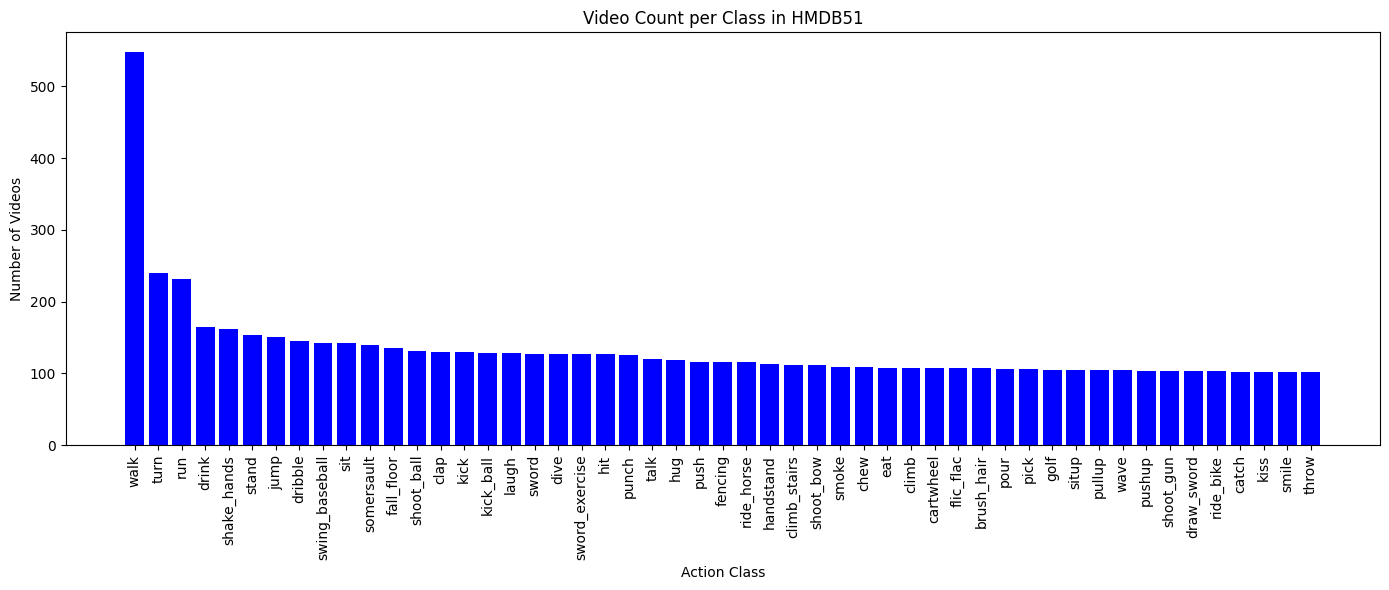

In [5]:
import matplotlib.pyplot as plt

# Extract class names and video counts from the sorted list
class_names = [item[0] for item in sorted_counts]
video_counts = [item[1] for item in sorted_counts]

# Plot the histogram
plt.figure(figsize=(14, 6))
plt.bar(class_names, video_counts, color='blue')
plt.xticks(rotation=90)
plt.title('Video Count per Class in HMDB51')
plt.xlabel('Action Class')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

The HMDB51 dataset contains 51 action classes, but the distribution of video samples across classes is imbalanced. The class with the highest number of videos is "walk", with 548 samples, which is more than twice as many as the second class, "turn", which has 240 videos.

On the opposite end, the class with the fewest videos has 101 samples. Most of the remaining classes are clustered around 140 to 160 videos, with a significant number of them having approximately 140 videos. This creates a distribution where a single class ("walk") is highly overrepresented, while the majority of classes have moderate and relatively similar sample sizes.

This kind of imbalance can lead to biased model performance, favoring classes with more training data. To ensure fair and effective training, it may be necessary to apply strategies such as data augmentation, class balancing, or weighted loss functions.

*Visualize the top 5 classes according to the number of videos*

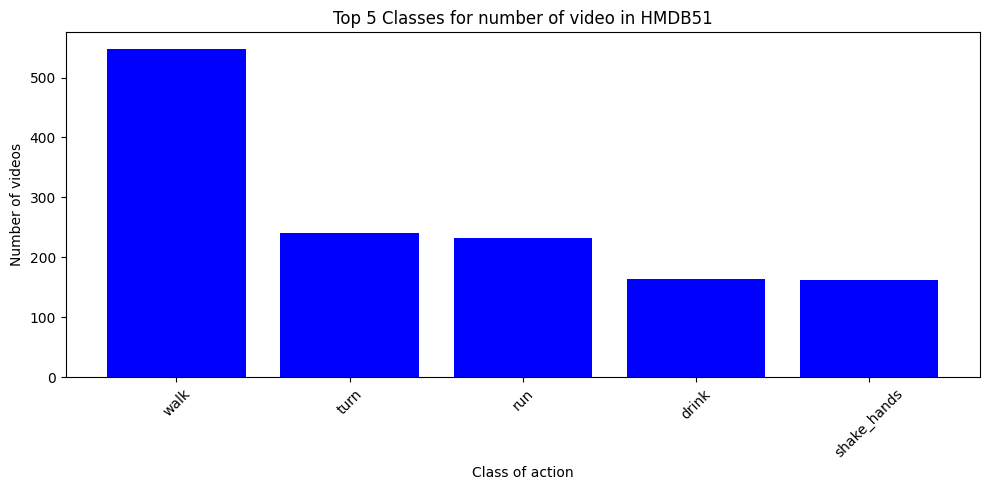

In [6]:
import matplotlib.pyplot as plt

# Extract only the first five class and count the number of video within them
top_5 = sorted_counts[:5]
class_names = [item[0] for item in top_5]
video_counts = [item[1] for item in top_5]

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.bar(class_names, video_counts, color='blue')
plt.xticks(rotation=45)
plt.title('Top 5 Classes for number of video in HMDB51')
plt.xlabel('Class of action')
plt.ylabel('Number of videos')
plt.tight_layout()
plt.show()

**Video metadata statistics**

In [7]:
import os
import subprocess
import json
import pandas as pd
import random
from concurrent.futures import ThreadPoolExecutor

def get_video_metadata_ffprobe(video_path):
    cmd = [
        'ffprobe', '-v', 'error',
        '-select_streams', 'v:0',
        '-show_entries', 'stream=width,height,r_frame_rate,duration,nb_frames',
        '-of', 'json', video_path
    ]
    try:
        result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
        data = json.loads(result.stdout)
        if not data['streams']:
            return None
        s = data['streams'][0]
        fps_parts = s['r_frame_rate'].split('/')
        fps = float(fps_parts[0]) / float(fps_parts[1]) if len(fps_parts) == 2 else float(fps_parts[0])
        frames = int(s['nb_frames']) if 'nb_frames' in s else 0
        duration = float(s['duration']) if 'duration' in s else frames / fps if fps > 0 else 0
        return {
            'frames': frames,
            'fps': fps,
            'duration_sec': duration,
            'width': int(s['width']),
            'height': int(s['height'])
        }
    except Exception:
        return None

def process_video(video_entry, class_name):
    meta = get_video_metadata_ffprobe(video_entry.path)
    if meta:
        meta['class'] = class_name
        meta['filename'] = video_entry.name
        return meta
    return None

def collect_random_subset(base_dir, sample_size=100):
    all_video_entries = []
    for class_entry in os.scandir(base_dir):
        if class_entry.is_dir():
            for video_entry in os.scandir(class_entry.path):
                if video_entry.name.endswith('.avi'):
                    all_video_entries.append((video_entry, class_entry.name))
    random.shuffle(all_video_entries)
    return all_video_entries[:sample_size]

def collect_metadata_sampled(base_dir, sample_size=100):
    metadata = []
    sample_entries = collect_random_subset(base_dir, sample_size)
    with ThreadPoolExecutor(max_workers=8) as executor:
        futures = [executor.submit(process_video, ve, cn) for ve, cn in sample_entries]
        for future in futures:
            result = future.result()
            if result:
                metadata.append(result)
    return metadata

# Adjust base_dir and sample_size as needed
sample_size = 1000

video_metadata = collect_metadata_sampled(base_dir, sample_size)

# Create DataFrame and print summary
df_meta = pd.DataFrame(video_metadata)
summary = df_meta[['frames', 'fps', 'duration_sec', 'width', 'height']].describe()
print(summary)


            frames     fps  duration_sec        width  height
count  1000.000000  1000.0   1000.000000  1000.000000  1000.0
mean     93.143000    30.0      3.104767   365.988000   240.0
std      63.991339     0.0      2.133045    76.234714     0.0
min      19.000000    30.0      0.633333   176.000000   240.0
25%      60.000000    30.0      2.000000   320.000000   240.0
50%      79.000000    30.0      2.633333   320.000000   240.0
75%      99.250000    30.0      3.308333   416.000000   240.0
max     695.000000    30.0     23.166667   592.000000   240.0


- **Frames**:
The dataset shows a wide range of video lengths in terms of frame count. On average, each video contains about 96 frames, with a minimum of 23 and a maximum of 1063 frames. The standard deviation is quite high at 70.54, indicating that the video lengths vary significantly and are not uniform across the dataset.

- **FPS**:
Frames per second are very consistent, with all videos recorded at 30 FPS. This is confirmed by the zero standard deviation, meaning there is no variation in the frame rate.

- **Duration (seconds)**:
The average video duration is approximately 3.20 seconds, with a minimum duration of 0.77 seconds and a maximum of 35.43 seconds. The median duration is 2.67 seconds, which is closer to the FIRST quartile (2 seconds) than to the third quartile (3.4 seconds). This indicates a right-skewed (positively skewed) distribution, meaning most videos are relatively "long", with a few shorter outliers decreasing the mean duration.

- **Resolution**:
The video height is constant at 240 pixels across all samples. However, the width varies notably from 176 to 592 pixels, meaning the videos have different aspect ratios, mostly around 4:3 or similar. This variability in width suggests that resizing will be necessary to standardize the video dimensions for processing.

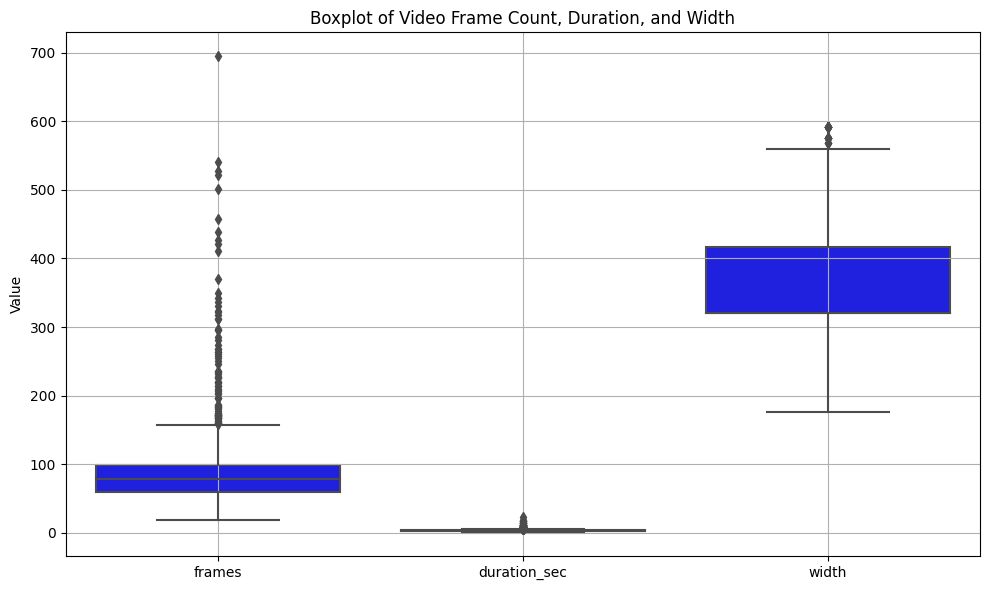

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns to plot
columns_to_plot = ['frames', 'duration_sec', 'width']

# Set green color theme
green_color = 'blue'

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_meta[columns_to_plot], color=green_color)

plt.title("Boxplot of Video Frame Count, Duration, and Width")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

The generated boxplot visualizes the distribution of three key video metadata characteristics in your dataset: frame count, duration in seconds, and width. Using boxplots is very helpful for quickly getting an idea of the central tendency, spread, and presence of anomalous values (outliers) for each of these metrics.

By analyzing the graph, you can observe the following:

- **Frames**: The boxplot for frames will show a box enclosing the central 50% of the data (between the first and third quartile). The line inside the box represents the median frame count. The "whiskers" extending from the box indicate the typical range of the data, while individual points beyond the whiskers represent potential outliers (videos significantly longer or shorter than the majority). Given the previous description mentioning a high standard deviation (68.1), it's likely that the boxplot will show a relatively wide box and/or multiple outliers, confirming the significant variability in video length in terms of frames.

- **Duration (seconds)**: Similar to the frame count, the boxplot for duration in seconds will show the median and interquartile range. Since duration is directly related to the frame count (assuming a constant FPS, which the description confirms is 30), you can expect the duration boxplot to mirror the frame distribution. The description mentions a left-skewed (negatively skewed) distribution, which might manifest in the boxplot with a median positioned more towards the upper end of the box and a shorter lower whisker compared to the upper one. Again, the presence of outliers will indicate videos with exceptionally long or short durations.

- **Width**: The boxplot for width will visualize the distribution of the different video widths. The previous description indicates that height is constant but width varies. This will be reflected in the width boxplot as a box covering a range of values (from 176 to 592 pixels according to the description). The shape of the box and the position of the median will give an idea of the most common widths and how they are distributed. Unlike frames and duration, the variability in width is intrinsic to the format of the original videos rather than their length over time.

The boxplot allows to quickly visualize the spread of the data for frames, duration, and width. A narrow box and short whiskers indicate low variability; a wide box and long whiskers indicate higher variability.
Identify the median (the central value) for each metric.
Recognize the interquartile range (the central 50% of the data).
Detect the presence of outliers, which are videos with exceptionally high or low values for these characteristics.
This graph visually confirms what was described in the preceding text regarding the significant variability in frame count and duration, the consistency of the FPS (which is not directly visualized here but implied in the relationship between frames and duration), and the variability in video width. It is an effective tool for gaining an overview of the "shape" and quantitative characteristics of your video data.

**Semantics similarities**

In [ ]:
pip install torchvision scikit-learn

Extracted features shape: (500, 512)


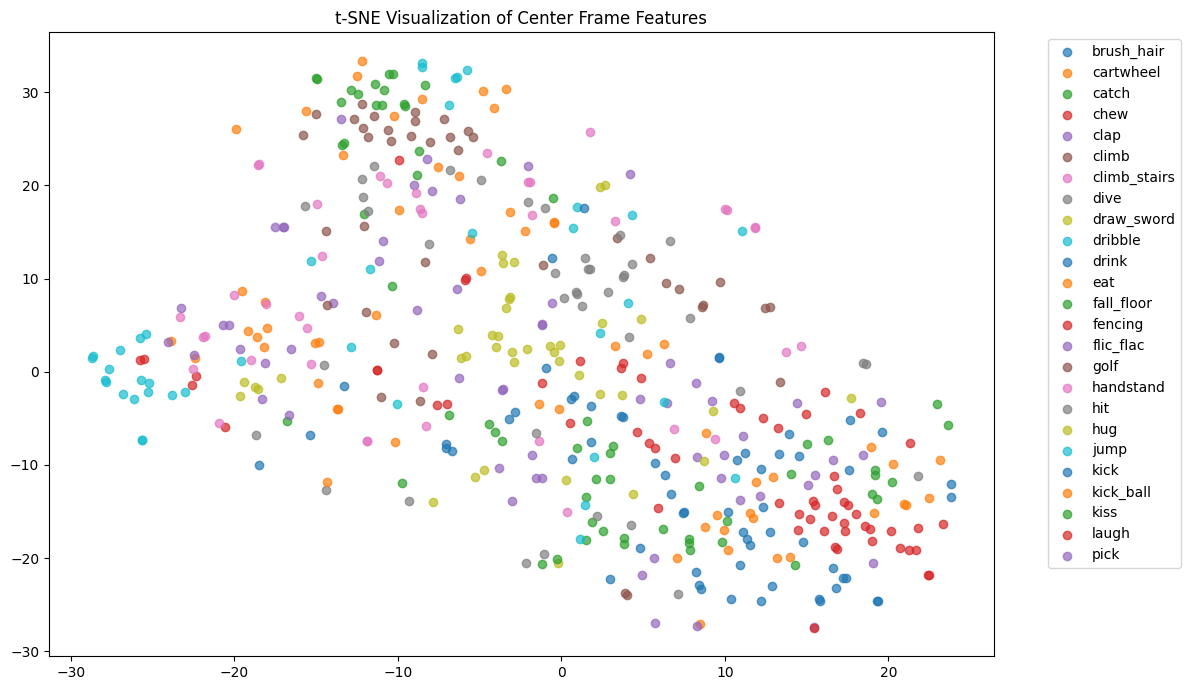

In [9]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

from PIL import Image
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from torchvision.models import resnet18, ResNet18_Weights

# ========== CONFIG ==========

dataset_path = base_dir
N_CLASSES = 25    # Number of classes to sample
VIDEOS_PER_CLASS = 20  # Number of videos per class

# ========== SETUP ==========

# Load class names
class_names = sorted([
    d for d in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, d))
])[:N_CLASSES]

# Load pretrained ResNet18, remove last FC layer
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model = torch.nn.Sequential(*list(model.children())[:-1])
model.eval()

# Preprocessing transform
transform = weights.transforms()

# ========== FUNCTIONS ==========

def extract_center_frame(video_path):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    center_frame = total_frames // 2
    cap.set(cv2.CAP_PROP_POS_FRAMES, center_frame)
    ret, frame = cap.read()
    cap.release()
    if not ret:
        return None
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return Image.fromarray(frame)

# ========== FEATURE EXTRACTION ==========

features, labels = [], []

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    video_list = [f for f in os.listdir(class_dir) if f.endswith('.avi')]
    sampled_videos = random.sample(video_list, min(VIDEOS_PER_CLASS, len(video_list)))

    for video_name in sampled_videos:
        video_path = os.path.join(class_dir, video_name)
        img = extract_center_frame(video_path)
        if img is not None:
            input_tensor = transform(img).unsqueeze(0)
            with torch.no_grad():
                feat = model(input_tensor).squeeze().cpu().numpy()
            features.append(feat)
            labels.append(class_name)

features = np.array(features)
print(f"Extracted features shape: {features.shape}")

# ========== DIMENSIONALITY REDUCTION ==========

# Step 1: PCA to 50D
features_pca = PCA(n_components=50).fit_transform(features)

# Step 2: t-SNE to 2D
X_2d = TSNE(n_components=2, perplexity=30, learning_rate=300, random_state=42).fit_transform(features_pca)


# ========== VISUALIZATION ==========

plt.figure(figsize=(12, 7))
unique_labels = sorted(set(labels))

for label in unique_labels:
    idxs = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(X_2d[idxs, 0], X_2d[idxs, 1], label=label, alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("t-SNE Visualization of Center Frame Features")
plt.tight_layout()
plt.show()


The t-SNE visualization shows the distribution of visual features extracted from the center frames of videos across 25 classes in the HMDB51 dataset, using a pre-trained ResNet18 model.

This 2D representation helps assess how well single-frame visual features capture differences between actions. Several patterns emerge:

1. Visual Clustering of Similar Actions: Some classes appear close together in the plot, suggesting shared visual characteristics. For example, catch, dribble, and kick cluster near each other—these actions often involve body movement, coordination, and sports-like environments. Similarly, chew, drink, and eat are also nearby, likely because they involve subtle facial or hand-mouth motions that look alike in static frames.

2. Well-Separated Actions: Some actions form clearly distinct clusters, indicating they have unique visual traits. brush_hair stands out, probably due to the recognizable presence of a hairbrush and the head-hand interaction. Actions like cartwheel, handstand, and flic_flac are also well separated, likely due to distinctive, dynamic body positions visible even in a single frame.

3. High Intra-Class Variability: Some classes are spread out more broadly, reflecting high variation in visual appearance. For instance, dive, climb_stairs, and kick_ball show wide dispersion, which may result from differences in scene backgrounds, perspectives, or ways the action is performed.

4. Overlapping Classes: Certain actions overlap significantly, making them hard to distinguish based solely on static images. Examples include hug, kiss, and hit, which can appear visually similar depending on the context or posture. Also, pick and draw_sword may overlap due to similar reaching or arm-extension motions.

In conclusion, this t-SNE plot highlights both the strengths and limitations of using center-frame features alone. While some actions are visually distinctive and easily separable, others require temporal context to be reliably classified. This supports the need for models that incorporate motion (e.g., 3D CNNs or LSTMs) or improved data curation for better action recognition.

**TRAINING**

**1.Frame Feature Extractor**

This code defines a feature extractor for single video frames using a pre-trained GoogLeNet convolutional neural network (CNN).

- It loads GoogLeNet with pretrained weights from ImageNet.

- The final classification layer is removed, so the model outputs a compact feature vector representing each frame’s visual content.

- During inference, the CNN weights are frozen (no training), and the output is a flattened feature vector per frame.

Purpose: Extract meaningful visual features from individual frames for later processing.

In [10]:
import torch
import torch.nn as nn
from torchvision.models import googlenet, GoogLeNet_Weights

class FrameFeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        weights = GoogLeNet_Weights.IMAGENET1K_V1
        model = googlenet(weights=weights)
        # Remove the final classification layer
        self.features = nn.Sequential(*list(model.children())[:-1])  # output: (B, 1024, 1, 1)

    def forward(self, x):
        # x: (B, C, H, W)
        with torch.no_grad():  # freeze CNN weights
            features = self.features(x)  # (B, 1024, 1, 1)
        features = features.view(features.size(0), -1)  # flatten (B, 1024)
        return features


In [11]:
# Test block
model = FrameFeatureExtractor()
dummy_input = torch.randn(4, 3, 224, 224)  # batch of 4 frames
features = model(dummy_input)
print("Feature shape:", features.shape)  # Expected output: [4, 1024]

Feature shape: torch.Size([4, 1024])


**2.Video Classification Model**

This builds a full video classification model combining the frame-level CNN with a temporal sequence model (LSTM).

- Frames are first passed through the CNN feature extractor to get embeddings.

- These embeddings form a sequence fed into an LSTM, which captures temporal dynamics across frames.

- The LSTM output from the last time step is used by a final linear classifier to predict the video class (e.g., one of 51 action categories).

Purpose: Model both spatial (frame-level) and temporal (across frames) information to classify entire videos.

In [12]:
class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, cnn_embed_dim=1024, lstm_hidden_size=256, num_classes=51, lstm_layers=1, dropout_p=0.5):
        super().__init__()
        self.cnn = FrameFeatureExtractor()
        self.lstm = nn.LSTM(input_size=cnn_embed_dim, hidden_size=lstm_hidden_size,
                            num_layers=lstm_layers, batch_first=True)
        self.dropout = nn.Dropout(p=dropout_p)  # Dropout layer
        self.classifier = nn.Linear(lstm_hidden_size, num_classes)

    def forward(self, x):
        # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)  # Flatten time and batch

        frame_features = self.cnn(x)  # (B*T, cnn_embed_dim)
        frame_features = frame_features.view(B, T, -1)  # (B, T, cnn_embed_dim)

        lstm_out, _ = self.lstm(frame_features)  # (B, T, lstm_hidden_size)
        last_hidden = lstm_out[:, -1, :]  # Last timestep output

        last_hidden = self.dropout(last_hidden)  # Apply dropout
        out = self.classifier(last_hidden)  # Final prediction
        return out

In [ ]:
# Test the CNN + LSTM model with dummy input
model = CNN_LSTM_VideoClassifier()
dummy_input = torch.randn(2, 16, 3, 224, 224)  # (batch=2, frames=16, channels=3, height=224, width=224)
output = model(dummy_input)
print("Output shape:", output.shape)  # Expected: [2, 51]


**3.Frame Sampling and Preprocessing**

This snippet handles extracting frames from video files:

- It samples a fixed number of frames uniformly across the video duration.

- Each frame is resized, normalized, and converted into a tensor suitable for the CNN.

- If the video has fewer frames, it repeats the last frame or uses a dummy tensor to fill the sequence.

Purpose: Prepare input videos by converting them into fixed-length sequences of preprocessed frames.

In [13]:
import cv2
from torchvision import transforms
from PIL import Image
import numpy as np
import torch

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

def sample_frames(video_path, num_frames=16, transform=transform):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    indices = np.linspace(0, max(total_frames - 1, 0), num_frames).astype(int)
    frames = []

    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret:
            continue
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = Image.fromarray(frame)
        if transform:
            frame = transform(frame)
        frames.append(frame)

    cap.release()

    if len(frames) < num_frames:
        if frames:
            last_frame = frames[-1]
            while len(frames) < num_frames:
                frames.append(last_frame.clone())
        else:
            dummy = torch.zeros(3, 224, 224)
            frames = [dummy for _ in range(num_frames)]

    frames = torch.stack(frames)  # (num_frames, C, H, W)
    return frames


In [14]:
video_path = base_dir
frames = sample_frames(video_path)

print(f"Sampled {frames.shape[0]} frames with shape {frames.shape[1:]}")  # Output: Sampled 16 frames with shape torch.Size([3, 224, 224])


Sampled 16 frames with shape torch.Size([3, 224, 224])


**4.Custom Dataset Class**

Defines a PyTorch dataset for the HMDB51 video dataset:

- Stores lists of video file paths and their corresponding labels.

- Uses the frame sampling function to load a fixed number of frames per video.

- Returns the tensor of frames along with the label for each sample.

Purpose: Enable easy loading and batching of video data for training/testing.

In [15]:
import os
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_video

# Optional: define any transformations to apply to the videos (e.g., resizing, normalization)
video_transform = None  # or a function/transforms you want to apply


# Gather video paths and labels
video_paths, labels, label_to_idx = [], [], {}
for idx, class_name in enumerate(sorted(os.listdir(base_dir))):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        label_to_idx[class_name] = idx
        for fname in os.listdir(class_dir):
            if fname.endswith('.avi'):
                video_paths.append(os.path.join(class_dir, fname))
                labels.append(idx)

# Split into train, validation, and test sets (70%, 15%, 15%)
train_idx, val_test_idx = train_test_split(
    list(range(len(video_paths))),
    test_size=0.3,
    stratify=labels,
    random_state=42
)
val_idx, test_idx = train_test_split(
    val_test_idx,
    test_size=0.5,
    stratify=[labels[i] for i in val_test_idx],
    random_state=42
)

class HMDB51Dataset(Dataset):
    def __init__(self, paths, labels, num_frames=16, transform=None):
        self.paths = paths
        self.labels = labels
        self.num_frames = num_frames
        self.transform = transform
       # self.class_names = sorted(set(self.labels))
        #self.label2idx = {label: idx for idx, label in enumerate(self.class_names)}
        #labels=labels-1

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        video_path = self.paths[idx]
        label = self.labels[idx]
        video_tensor = sample_frames(video_path, self.num_frames, self.transform)
        return video_tensor, torch.tensor(label).long()

SAMPLED_NUM_FRAMES = 16

# Create datasets
train_dataset = HMDB51Dataset(
    [video_paths[i] for i in train_idx],
    [labels[i] for i in train_idx],
    transform=video_transform
)

val_dataset = HMDB51Dataset(
    [video_paths[i] for i in val_idx],
    [labels[i] for i in val_idx],
    transform=video_transform
)

test_dataset = HMDB51Dataset(
    [video_paths[i] for i in test_idx],
    [labels[i] for i in test_idx],
    transform=video_transform
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)


**5.Dataset Instantiation**

Creates training, validation, and test datasets by:

- Splitting the video paths and labels into train/val/test subsets.

- Applying transformations (like the preprocessing defined earlier).

- Using the custom dataset class to wrap these subsets.

Purpose: Organize the data splits for model training and evaluation.

In [16]:
# Assuming that 'transform' is already defined as in the third point

SAMPLED_NUM_FRAMES = 16

train_dataset = HMDB51Dataset(
    [video_paths[i] for i in train_idx],
    [labels[i] for i in train_idx],
    num_frames=SAMPLED_NUM_FRAMES,
    transform=transform
)

val_dataset = HMDB51Dataset(
    [video_paths[i] for i in val_idx],
    [labels[i] for i in val_idx],
    num_frames=SAMPLED_NUM_FRAMES,
    transform=transform
)

test_dataset = HMDB51Dataset(
    [video_paths[i] for i in test_idx],
    [labels[i] for i in test_idx],
    num_frames=SAMPLED_NUM_FRAMES,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)


In [ ]:
!apt-get update
!apt-get install -y ffmpeg libavdevice-dev libavfilter-dev libavformat-dev libavcodec-dev libavutil-dev libswscale-dev
!pip install av

**6.Training Loop**

Sets up the training environment and runs model training:

- Moves the model to GPU if available.

- Defines loss function (cross-entropy) and optimizer (Adam).

- Iterates over epochs and batches of training data, feeding video frame sequences into the model.

- Computes loss, backpropagates gradients, and updates model weights.

- Tracks and prints average loss per epoch.

Purpose: Train the CNN+LSTM model to classify videos based on their frame sequences.


In [ ]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


In [17]:
import os
import torch
import torch.nn as nn

# Debug CUDA
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

try:
    model = CNN_LSTM_VideoClassifier(num_classes=51)
    print("Model:")
    print(model)
    model = model.to(device)
except Exception as e:
    print("Error")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_idx, (frames, labels) in enumerate(train_loader):
        print(f"\nBatch {batch_idx + 1}")
        print(f"Frames shape: {frames.shape}, dtype: {frames.dtype}, device: {frames.device}")
        print(f"Labels shape: {labels.shape}, dtype: {labels.dtype}, unique: {labels.unique()}")

        # No need to skip the batch anymore: the labels are mapped from 0 to 50
        if labels.max() >= 51:
            print(f" Label out of  range: {labels.max().item()}.")
            continue

        # Check NaN or Inf
        if torch.isnan(frames).any() or torch.isinf(frames).any():
            print("Trovati NaN o Inf nei frame. Salto il batch.")
            continue

        try:
            frames = frames.float().to(device)
            labels = labels.long().to(device)

            optimizer.zero_grad()
            outputs = model(frames)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        except RuntimeError as e:
            print("Errore durante il forward/backward pass:", e)
            continue

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")


Model:
CNN_LSTM_VideoClassifier(
  (cnn): FrameFeatureExtractor(
    (features): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (2): BasicConv2d(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): BasicConv2d(
        (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (5): Inception(
        (branch1): BasicConv2d(
          (conv): Conv2d(192, 64, kern

**fully connected model**
We decide to use this pre trained model because the one with CNN + LSTM gives us problems due to GPU memory in the phase of training loop, where it stops at epoch five.


In [20]:
import os
import cv2
import torch
import numpy as np
from PIL import Image

# --- 1. Define the dataset path ---
#base_dir = "/content/drive/MyDrive/Deep Learning/hmdb51_org"

# --- 2. Collect full paths of video files ---
files = []

for lab in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, lab)
    if os.path.isdir(class_path):
        for f in os.listdir(class_path):
            if f.endswith(".avi"):
                files.append(os.path.join(class_path, f))

# --- 3. Select the video file of interest (e.g., index 1) ---
idx = 1
filename = files[idx]

# --- 4. Read the video using OpenCV ---
cap = cv2.VideoCapture(filename)
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(torch.tensor(frame))  # [H, W, C]

cap.release()

# --- 5. Stack frames into a tensor [T, H, W, C] ---
video_tensor = torch.stack(frames)

# --- 6. Video information ---
num_frames, height, width, num_channels = video_tensor.shape
print(f"Video shape: {video_tensor.shape}")
print(f"Height: {height}, Width: {width}, Channels: {num_channels}, Frames: {num_frames}")


Video shape: torch.Size([369, 240, 320, 3])
Height: 240, Width: 320, Channels: 3, Frames: 369


In [27]:
#Import a pretrained nn
import torch
import torchvision.models as models
import torchvision.transforms as transforms

# Load the pretrained GoogLeNet model
from torchvision.models import googlenet, GoogLeNet_Weights

weights = GoogLeNet_Weights.DEFAULT
netCNN = googlenet(weights=weights)

# Set the model to evaluation mode
netCNN.eval()

# Example image transform (ImageNet preprocessing)
transform = weights.transforms()


In [ ]:
import os
if os.path.exists("/tmp/hmdb51_features.pkl"):
    os.remove("/tmp/hmdb51_features.pkl")
    print("File delle feature eliminato. Ora sarà ricreato da zero.")

In [29]:
import os
import cv2
import torch
import numpy as np
import pickle
from torchvision.models import googlenet, GoogLeNet_Weights
from torchvision.models.feature_extraction import create_feature_extractor
import torchvision.transforms as transforms
from tqdm import tqdm

# --- 1. Configuration ---
base_dir = dataset_path
#output_file = "/tmp/hmdb51_features.pkl"
num_frames_to_sample = 16

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- 2. Inizializa GoogLeNet for feature extraction  ---
weights = GoogLeNet_Weights.DEFAULT
model = googlenet(weights=weights).to(device).eval()
return_nodes = {"avgpool": "features"}
feature_extractor = create_feature_extractor(model, return_nodes=return_nodes).to(device)
transform = weights.transforms()

# --- 3. Function: load video e give tensor [T, C, H, W] ---
def load_video(path):
    cap = cv2.VideoCapture(path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = torch.tensor(frame).permute(2, 0, 1).float() / 255.0  # (C, H, W)
        frames.append(frame)
    cap.release()
    if len(frames) == 0:
        raise ValueError(f"No frames extracted from {path}")
    return torch.stack(frames)  # (T, C, H, W)

# --- 4. Funzione: campiona N frame da un video ---
def sample_frames(video, num_frames=16):
    total = video.shape[0]
    if total < num_frames:
        pad = video[-1:].repeat(num_frames - total, 1, 1, 1)
        video = torch.cat([video, pad], dim=0)
    else:
        indices = np.linspace(0, total - 1, num_frames, dtype=int)
        video = video[indices]
    return video

# --- 5. Groups all video paths ---
video_paths = []
for class_folder in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        for fname in os.listdir(class_path):
            if fname.endswith(".avi"):
                video_paths.append(os.path.join(class_path, fname))

# --- 6. Features extraction ---
if os.path.exists(output_file):
    print("Loading cached features...")
    with open(output_file, "rb") as f:
        features_list = pickle.load(f)
else:
    features_list = []
    for path in tqdm(video_paths, desc="Processing videos"):
        try:
            video = load_video(path)  # [T, C, H, W]
            video = sample_frames(video, num_frames=num_frames_to_sample)
            video = torch.stack([transform(frame) for frame in video]).to(device)  # (T, C, H, W)
            with torch.no_grad():
                feats = feature_extractor(video)["features"]  # (T, 1024, 1, 1)
                feats = feats.squeeze(-1).squeeze(-1)  # (T, 1024)
                features_list.append(feats.cpu().numpy())
        except Exception as e:
            print(f"Failed on {path}: {e}")
            features_list.append(None)

    with open(output_file, "wb") as f:
        pickle.dump(features_list, f)
    print(f"Saved extracted features to: {output_file}")


Using device: cuda


Processing videos: 100%|██████████| 6766/6766 [19:02<00:00,  5.92it/s] 


Saved extracted features to: /tmp/hmdb51_features.pkl


In [31]:
import pickle
import os
from sklearn.preprocessing import LabelEncoder

with open("/tmp/hmdb51_features.pkl", "rb") as f:
    sequences = pickle.load(f)

# Ricreate video_paths if not defined
base_dir = dataset_path
video_paths = []
for class_folder in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        for fname in os.listdir(class_path):
            if fname.endswith(".avi"):
                video_paths.append(os.path.join(class_path, fname))

# Extract the labels from the directory
labels = [os.path.basename(os.path.dirname(p)) for p in video_paths]

# Label encoding
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

print(f"Number of samples: {len(sequences)}")
print(f"Number of labels: {len(labels_encoded)}")
print(f"Class names: {le.classes_}")



Number of samples: 6766
Number of labels: 6766
Class names: ['brush_hair' 'cartwheel' 'catch' 'chew' 'clap' 'climb' 'climb_stairs'
 'dive' 'draw_sword' 'dribble' 'drink' 'eat' 'fall_floor' 'fencing'
 'flic_flac' 'golf' 'handstand' 'hit' 'hug' 'jump' 'kick' 'kick_ball'
 'kiss' 'laugh' 'pick' 'pour' 'pullup' 'punch' 'push' 'pushup' 'ride_bike'
 'ride_horse' 'run' 'shake_hands' 'shoot_ball' 'shoot_bow' 'shoot_gun'
 'sit' 'situp' 'smile' 'smoke' 'somersault' 'stand' 'swing_baseball'
 'sword' 'sword_exercise' 'talk' 'throw' 'turn' 'walk' 'wave']


*training*

In [32]:

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import numpy as np

class VideoFeatureDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        x = torch.tensor(self.sequences[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.long)
        return x, y

# Remove none sequences
valid_data = [(seq, lbl) for seq, lbl in zip(sequences, labels_encoded) if seq is not None]
sequences_clean, labels_clean = zip(*valid_data)
sequences_clean = list(sequences_clean)
labels_clean = list(labels_clean)

# Train/val split stratificated
seq_train, seq_val, lbl_train, lbl_val = train_test_split(
    sequences_clean, labels_clean, test_size=0.1, stratify=labels_clean, random_state=42
)

train_dataset = VideoFeatureDataset(seq_train, lbl_train)
val_dataset = VideoFeatureDataset(seq_val, lbl_val)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

num_classes = len(np.unique(labels_clean))

# Define the simple fully connected model
model = nn.Sequential(
    nn.Linear(1024, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, num_classes)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


Training samples: 6089
Validation samples: 677


In [33]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for features, labels in train_loader:
        features = features.to(device)      # (B, T, 1024)
        labels = labels.to(device)          # (B,)

        inputs = features.mean(dim=1)      # temporal mean (B, 1024)

        optimizer.zero_grad()
        outputs = model(inputs)             # (B, num_classes)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * features.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/10], Loss: 3.5712
Epoch [2/10], Loss: 2.9212
Epoch [3/10], Loss: 2.5037
Epoch [4/10], Loss: 2.2568
Epoch [5/10], Loss: 2.0800
Epoch [6/10], Loss: 1.9531
Epoch [7/10], Loss: 1.8526
Epoch [8/10], Loss: 1.7695
Epoch [9/10], Loss: 1.7006
Epoch [10/10], Loss: 1.6342


In [ ]:
!pip install av

In [34]:
print(f"Total sequences: {len(sequences)}")
print(f"Valid sequences (not None): {len(valid_data)}")

Total sequences: 6766
Valid sequences (not None): 6766


*evaluation*


Validation Loss: 1.6893
Accuracy: 0.5436

Classification Report:
              precision    recall  f1-score   support

           0     0.7778    0.6364    0.7000        11
           1     0.0000    0.0000    0.0000        11
           2     0.4545    0.5000    0.4762        10
           3     0.5455    0.5455    0.5455        11
           4     0.5000    0.4615    0.4800        13
           5     0.6923    0.8182    0.7500        11
           6     0.5455    0.5455    0.5455        11
           7     0.4706    0.6154    0.5333        13
           8     0.8333    0.5000    0.6250        10
           9     0.7895    1.0000    0.8824        15
          10     0.3636    0.5000    0.4211        16
          11     1.0000    0.4545    0.6250        11
          12     0.1579    0.2143    0.1818        14
          13     0.7500    0.5000    0.6000        12
          14     0.5000    0.2727    0.3529        11
          15     0.8182    0.9000    0.8571        10
          16   

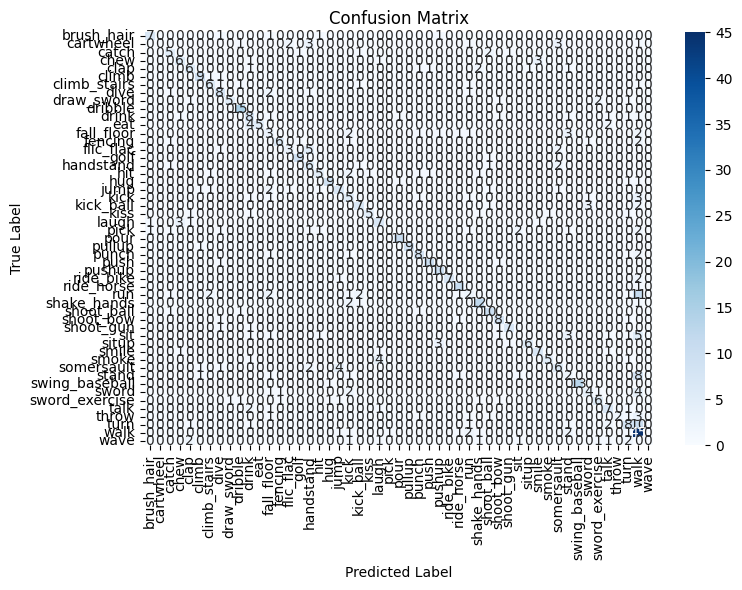

Evaluate function finished.


In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch.nn as nn

def evaluate(model, val_loader, device, class_names=None):
    model.eval()
    all_preds = []
    all_labels = []
    val_loss = 0.0

    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for features, labels in val_loader:
            features = features.to(device)
            labels = labels.to(device)

            x = features.mean(dim=1)

            outputs = model(x)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * features.size(0)

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = val_loss / len(val_loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, digits=4, zero_division=0)
    cm = confusion_matrix(all_labels, all_preds)

    print(f"\nValidation Loss: {avg_loss:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(report)

    plt.figure(figsize=(8, 6))
    xticklabels = class_names if (class_names is not None and len(class_names) > 0) else range(cm.shape[0])
    yticklabels = class_names if (class_names is not None and len(class_names) > 0) else range(cm.shape[0])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=xticklabels,
                yticklabels=yticklabels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return avg_loss, acc

# Call to the evaluation function
evaluate(model, val_loader, device, class_names=le.classes_)
print("Evaluate function finished.")


**REDUCED DATASET**

The following code aims to create a dataset class for video classification tasks by sampling frames from video files. Let's explore it.

1. The function *sample_frames*, extracts a fixed number of frames (num_frames, default = 16) from a video.

2. Class *VideoDataset* is a custom dataset class inheriting from PyTorch’s Dataset, used for loading video data. Base_dir is the path to the root directory containing video files, organized by class folders.It initializes:*samples* ( List of full paths to .avi video files),*labels* ( Corresponding numerical labels for each video),*label2idx* ( Maps each class (folder name) to a unique integer label)

In [37]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2
base_dir=dataset_path

#  Frame Sampling Function
def sample_frames(video_path, num_frames=16, transform=None):
    cap = cv2.VideoCapture(video_path) #Opens the video file for reading
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) #Gets the total number of frames in the video.
    indices = np.linspace(0, max(total_frames - 1, 0), num_frames).astype(int) #Generates num_frames
    #evenly spaced indices across the video's frame range.
    frames = []

    for idx in indices:  #Seeks to each selected frame index.
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read() #Reads the frame.
        if not ret:
            continue
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #Converts it from BGR (OpenCV default) to RGB.
        #from Blue-Green-Red to Red-Green-Blue
        frame = Image.fromarray(frame) #Converts it to a PIL.Image for compatibility with torchvision transforms
        if transform:
            frame = transform(frame) #Applies the transform
        frames.append(frame) #Append to list

    cap.release()
    if len(frames) < num_frames: #If there are fewer than num_frames extracted,
    # the last available frame is duplicated to reach the required number.
        last = frames[-1] if frames else torch.zeros(3, 224, 224)
        while len(frames) < num_frames:
            frames.append(last.clone())

    return torch.stack(frames)  #Returns a 4d Tensor shape

# Dataset
class VideoDataset(Dataset):
    def __init__(self, base_dir, num_frames=16, transform=None):
        self.samples = []
        self.labels = []
        self.label2idx = {}
        self.transform = transform
        self.num_frames = num_frames

        for idx, class_name in enumerate(sorted(os.listdir(base_dir))):
            class_dir = os.path.join(base_dir, class_name)
            if os.path.isdir(class_dir):
                self.label2idx[class_name] = idx
                for fname in os.listdir(class_dir):
                    if fname.endswith('.avi'):
                        self.samples.append(os.path.join(class_dir, fname))
                        self.labels.append(idx)

    def __len__(self):
        return len(self.samples) #Returns the number of video samples.

    def __getitem__(self, idx):
        video_path = self.samples[idx]
        label = self.labels[idx]
        video = sample_frames(video_path, self.num_frames, self.transform)
        return video, label  #returns a tuple: (video_tensor, label)



# Neural network implementation

To begin our analysis, we first needed to prepare the dataset. Given the large size of the original dataset and constraints related to GPU memory and processing time, we decided to limit the number of videos per class. This allowed us to reduce computational load while still maintaining class balance. The filtered dataset was then split into training and validation sets to support model development and evaluation.

Then we will create trainloaders, theyefficiently load mini-batches of training data from  dataset during model training.

In [38]:
# Imports and Setup

import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2
import random
from collections import defaultdict

# Set global seed for reproducibility
SEED = 42
torch.manual_seed(SEED)      # Ensures reproducible behavior in PyTorch
random.seed(SEED)            # Ensures reproducibility for Python's random module

# Dataset

base_dir = dataset_path
base_path = dataset_path

# Define transformation for each frame
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Create the full dataset
full_dataset = VideoDataset(base_path, num_frames=16, transform=transform)

# Function to Limit Videos per Class

def limit_videos_per_class_random(dataset, max_per_class=30):
    # Group indices by class
    class_to_indices = defaultdict(list)
    for idx, label in enumerate(dataset.labels):
        class_to_indices[label].append(idx)

    selected_indices = []
    for label, indices in class_to_indices.items():
        random.shuffle(indices)                   # Shuffle indices for randomness
        selected_indices.extend(indices[:max_per_class])  # Take up to max_per_class samples

    random.shuffle(selected_indices)              # Shuffle selected samples across all classes

    # Filtered samples and labels
    filtered_samples = [dataset.samples[i] for i in selected_indices]
    filtered_labels = [dataset.labels[i] for i in selected_indices]

    # Create a new VideoDataset instance without calling __init__
    limited_dataset = VideoDataset.__new__(VideoDataset)
    limited_dataset.samples = filtered_samples
    limited_dataset.labels = filtered_labels
    limited_dataset.label2idx = dataset.label2idx
    limited_dataset.transform = dataset.transform
    limited_dataset.num_frames = dataset.num_frames

    return limited_dataset

# Use Limiting Function

dataset = VideoDataset(base_dir=base_dir, num_frames=16, transform=transform)

# Limit to a maximum of 30 videos per class
limited_dataset = limit_videos_per_class_random(dataset, max_per_class=30)
print(f"Limited dataset almost 30 video per class, tot: {len(limited_dataset)}")

# Train/Validation Split

val_size = int(0.3 * len(limited_dataset))        # 30% of data for validation
train_size = len(limited_dataset) - val_size      # Remaining 70% for training

SAMPLED_NUM_FRAMES = 8

# Randomly split dataset with fixed seed for reproducibility
train_dataset, val_dataset = random_split(
    limited_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(SEED)  # Ensures consistent split each run
)

# Dataloaders

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=2)


Limited dataset almost 30 video per class, tot: 1530


In [39]:
video, label = train_dataset[0]
print(video.shape)  # Should be (16, 3, 224, 224)
print(label)        # Should be a tensor: 0 <= label < 51
print("Training samples:", len(train_dataset))
print("Validation samples:", len(val_dataset))

torch.Size([16, 3, 224, 224])
11
Training samples: 1071
Validation samples: 459


The following code defines a video classification model using a combination of a Convolutional Neural Network (CNN) and a Long Short-Term Memory (LSTM) network.

The *CNN* processes each video frame to extract spatial features.

The *LSTM* processes the sequence of frame features to capture temporal patterns.

A *fully connected layer* at the end maps the temporal representation to class scores.

This architecture is useful for tasks like action recognition, where both spatial and temporal information in videos are important.

In [40]:
import torch
import torch.nn as nn

# Model 1: CNN + LSTM for Video Classification

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_size=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        # CNN to extract spatial features from each video frame
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Conv layer 1: (B, 3, H, W) -> (B, 32, H, W)
            nn.ReLU(),
            nn.MaxPool2d(2),                             # Downsample: H/2, W/2
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # Conv layer 2
            nn.ReLU(),
            nn.MaxPool2d(2),                             # Further downsample
            nn.Conv2d(64, 128, kernel_size=3, padding=1),# Conv layer 3
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))                 # Output fixed to (B, 128, 1, 1)
        )

        # LSTM to process temporal sequence of features (one per frame)
        self.lstm = nn.LSTM(
            input_size=128,     # Input size matches CNN output
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True    # Input shape: (batch, time, features)
        )

        # Final fully connected layer for classification
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Input shape: (B, T, C, H, W)
        B, T, C, H, W = x.size()

        # Merge batch and time dims to apply CNN to each frame
        x = x.view(B * T, C, H, W)      # (B*T, C, H, W)
        x = self.cnn(x)                 # (B*T, 128, 1, 1)
        x = x.view(B, T, -1)            # Reshape to (B, T, 128)

        # Pass through LSTM; get hidden state from last time step
        _, (hn, _) = self.lstm(x)       # hn shape: (num_layers, B, hidden_size)

        out = self.fc(hn[-1])           # Use output from last LSTM layer
        return out                      # Output shape: (B, num_classes)


In [41]:
train_dataset, val_dataset
train_loader, val_loader

(<torch.utils.data.dataloader.DataLoader at 0x79d0ab9f6610>,
 <torch.utils.data.dataloader.DataLoader at 0x79d0abaff450>)

This block trains the *CNN_LSTM_VideoClassifier* on the training set using the Adam optimizer and cross-entropy loss for multi-class classification. The model runs for a specified number of epochs on a GPU, tracking and printing the average loss per epoch.

In [42]:
# Choice of device: GPU if available, else fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and move it to the chosen device
model = CNN_LSTM_VideoClassifier(num_classes=51).to(device)

# Define the loss function (suitable for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Use Adam optimizer for weight updates
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Number of training epochs
num_epochs = 10

# Store average training losses per epoch
losses1 = []

# Training Loop
for epoch in range(num_epochs):
    model.train()                      # Set model to training mode
    running_loss = 0.0                 # Track loss per epoch

    for frames, labels in train_loader:
        frames = frames.to(device)             # Move video frames to device: shape (B, T, C, H, W)
        labels = labels.to(device).long()      # Move labels to device: shape (B,)

        optimizer.zero_grad()                 # Clear previous gradients
        outputs = model(frames)               # Forward pass
        loss = criterion(outputs, labels)     # Compute loss
        loss.backward()                       # Backpropagate
        optimizer.step()                      # Update model parameters

        running_loss += loss.item()           # Accumulate loss

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    losses1.append(avg_loss)

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.9031
Epoch [2/10], Loss: 3.7705
Epoch [3/10], Loss: 3.7363
Epoch [4/10], Loss: 3.7106
Epoch [5/10], Loss: 3.6831
Epoch [6/10], Loss: 3.6567
Epoch [7/10], Loss: 3.6169
Epoch [8/10], Loss: 3.5597
Epoch [9/10], Loss: 3.5134
Epoch [10/10], Loss: 3.4659


In [43]:
# Set model to evaluation mode
model.eval()

correct, total = 0, 0

# Saves memory and computations
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)       # Move frames to device
        labels = labels.to(device)       # Move labels to device

        outputs = model(frames)          # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get class with highest score

        # Count correct predictions
        correct += (predicted == labels).sum().item()
        total += labels.size(0)          # Total number of samples

# Calculate and print accuracy as percentage
print(f"Validation Accuracy: {100 * correct / total:.2f}%")

# Save the model’s learned weights to a file for later use or deployment
torch.save(model.state_dict(), "cnn_lstm_model1.pth")


Validation Accuracy: 5.88%


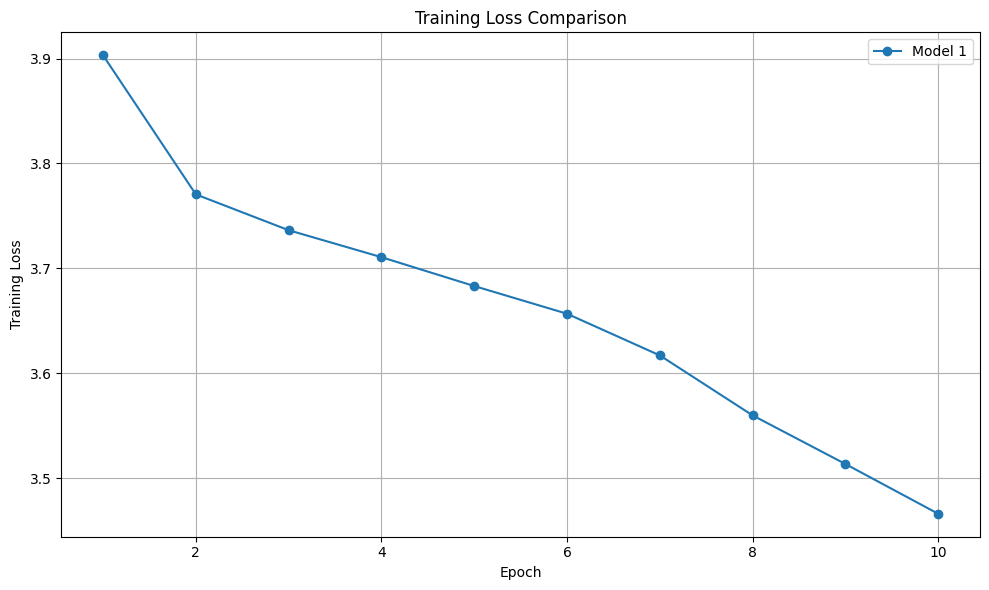

In [44]:
#Loss representation

import matplotlib.pyplot as plt

epochs = list(range(1, 11))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses1, label='Model 1', marker='o')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This model improves on the first by adding *Batch Normalization* and using LeakyReLU activation functions in the CNN layers. These modifications often help with:

Stabilizing and speeding up training (BatchNorm).

Better gradient flow and avoiding dead neurons (LeakyReLU instead of ReLU).

In [45]:
#Model 2

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_size=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        # CNN backbone with BatchNorm and LeakyReLU for better training stability
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),          # Normalizes activations in each batch
            nn.LeakyReLU(),              # Allows small gradient when inactive
            nn.MaxPool2d(2),             # Downsample spatial dims by 2 (112x112)

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),             # Further downsample (56x56)

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.AdaptiveAvgPool2d((1, 1)) # Output fixed size (B, 128, 1, 1)
        )

        # LSTM to model temporal relationships between frames
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Final linear layer for classification
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):  # Input shape: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Treat each frame as separate input to CNN
        x = self.cnn(x)              # Extract features per frame
        x = x.view(B, T, -1)         # Reshape to sequence for LSTM (B, T, 128)
        _, (hn, _) = self.lstm(x)   # Get hidden state from last LSTM layer
        out = self.fc(hn[-1])        # Classify based on final hidden state
        return out
model2 = CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model2.state_dict(), "cnn_lstm_model2.pth")
train_dataset, val_dataset
train_loader, val_loader


(<torch.utils.data.dataloader.DataLoader at 0x79d0ab9f6610>,
 <torch.utils.data.dataloader.DataLoader at 0x79d0abaff450>)

In [46]:
import torch
import torch.nn as nn
from torch.amp import autocast, GradScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model2 = CNN_LSTM_VideoClassifier(num_classes=51)
model2.load_state_dict(torch.load("cnn_lstm_model2.pth"))
model2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

num_epochs = 10

losses2=[]
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)             # (B, T, C, H, W)
        labels = labels.to(device).long()      # (B,)

        optimizer.zero_grad()
        outputs = model2(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses2.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.9154
Epoch [2/10], Loss: 3.8281
Epoch [3/10], Loss: 3.7924
Epoch [4/10], Loss: 3.7419
Epoch [5/10], Loss: 3.7169
Epoch [6/10], Loss: 3.6904
Epoch [7/10], Loss: 3.6930
Epoch [8/10], Loss: 3.6474
Epoch [9/10], Loss: 3.6284
Epoch [10/10], Loss: 3.6106


In [47]:
model2.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model2(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")
torch.save(model2.state_dict(), "cnn_lstm_model2.pth")

Validation Accuracy: 7.84%


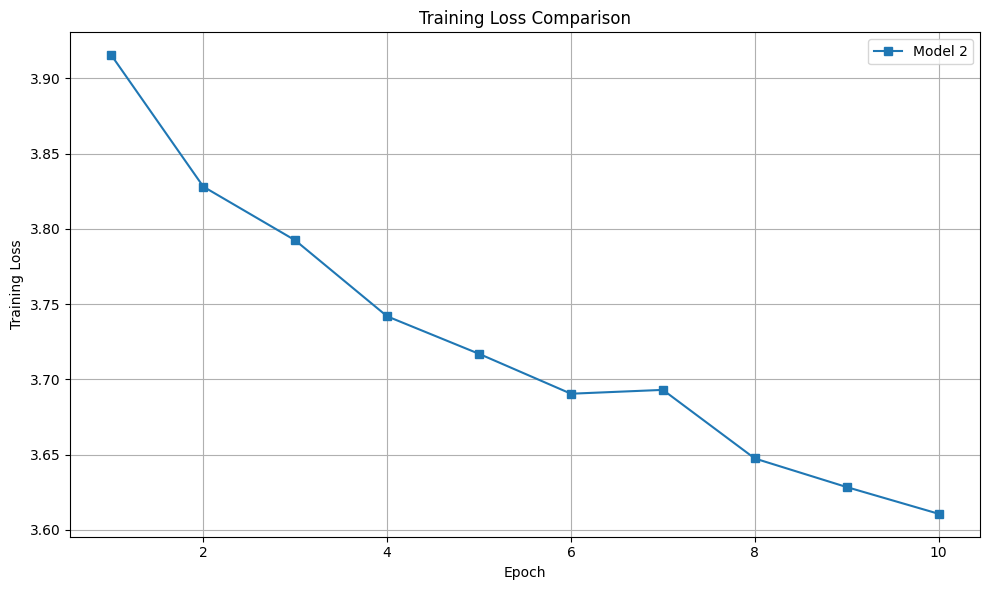

In [48]:
#Losses plot
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses2, label='Model 2', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This model builds upon Model 2 by adding *Dropout2d layers* after some convolutional blocks to help reduce overfitting by randomly zeroing entire channels during training. Dropout is commonly used to improve generalization.

In [50]:
#Model 3

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_size=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        # CNN backbone with BatchNorm, LeakyReLU, and Dropout for regularization
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),          # Normalize batch activations
            nn.LeakyReLU(),              # Activation with small gradient when inactive
            nn.Dropout2d(0.2),           # Drop channels randomly with p=0.2
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),             # Downsample spatial size (112x112)

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.Dropout2d(0.3),           # Higher dropout probability here
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),             # Downsample spatial size (56x56)

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.AdaptiveAvgPool2d((1, 1)) # Fixed output size (B, 128, 1, 1)
        )

        # LSTM for temporal modeling across frames
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Final classification layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):  # Input shape: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Treat frames independently for CNN feature extraction
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Sequence of frame features (B, T, 128)
        _, (hn, _) = self.lstm(x)   # Last LSTM hidden state
        out = self.fc(hn[-1])        # Classification output
        return out

# Instantiate model and save initial weights
model3 = CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model3.state_dict(), "cnn_lstm_model3.pth")


In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model3 = CNN_LSTM_VideoClassifier(num_classes=51)
model3.load_state_dict(torch.load("cnn_lstm_model3.pth"))
model3.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-4)

num_epochs = 10

losses3=[]
for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)             # (B, T, C, H, W)
        labels = labels.to(device).long()      # (B,)

        optimizer.zero_grad()
        outputs = model3(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses3.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.9238
Epoch [2/10], Loss: 3.8586
Epoch [3/10], Loss: 3.8255
Epoch [4/10], Loss: 3.8031
Epoch [5/10], Loss: 3.7723
Epoch [6/10], Loss: 3.7464
Epoch [7/10], Loss: 3.7073
Epoch [9/10], Loss: 3.6860
Epoch [10/10], Loss: 3.6706


In [52]:
model3.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model3(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 6.10%


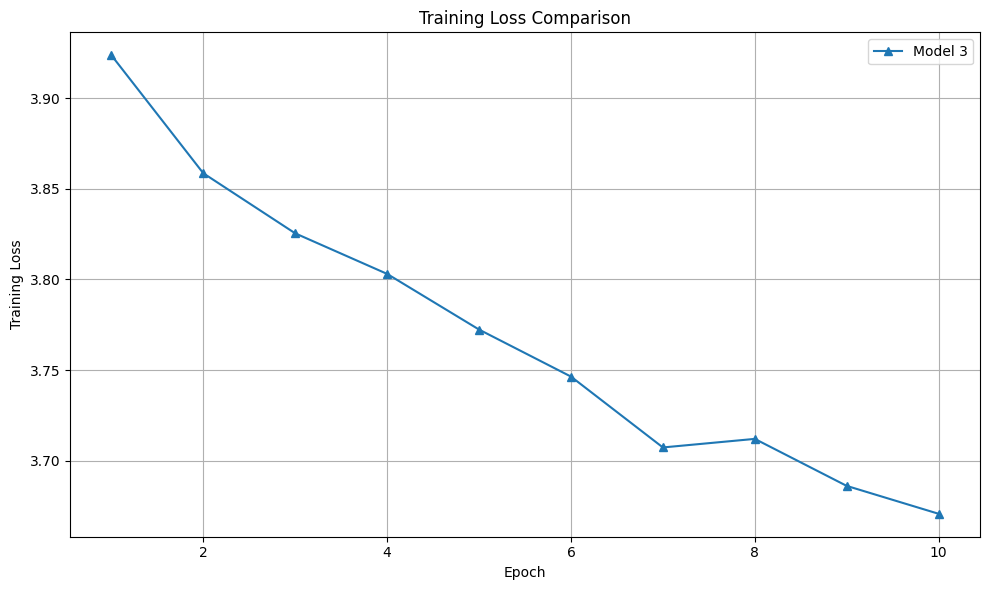

In [53]:
#Plot of losses
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses3, label='Model 3', marker='^')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


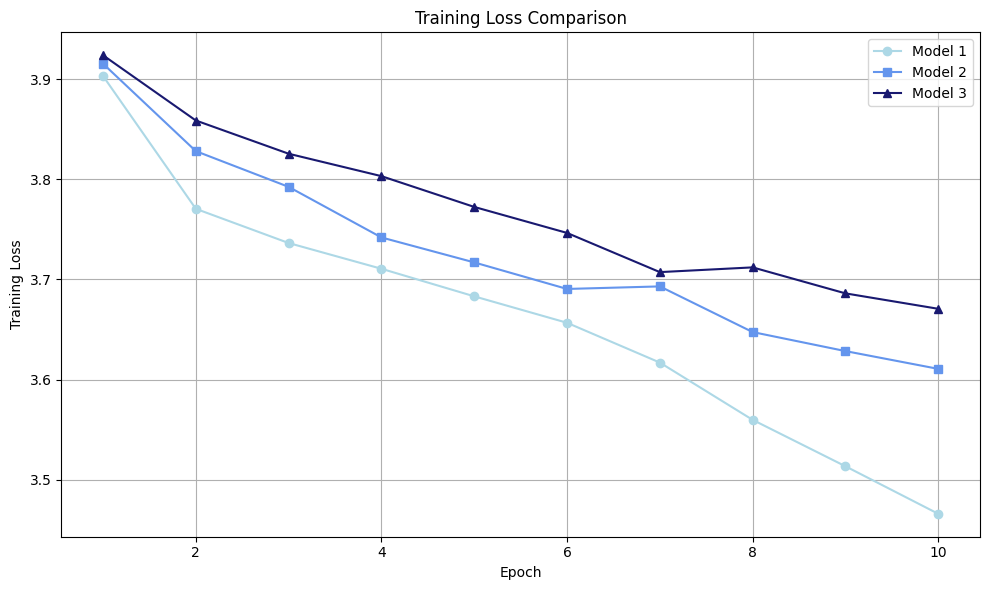

In [54]:
#The following plot will compare the losses among the 3 models
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses1, label='Model 1', marker='o',color='lightblue')
plt.plot(epochs, losses2, label='Model 2', marker='s', color='cornflowerblue')
plt.plot(epochs, losses3, label='Model 3', marker='^',color='midnightblue')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

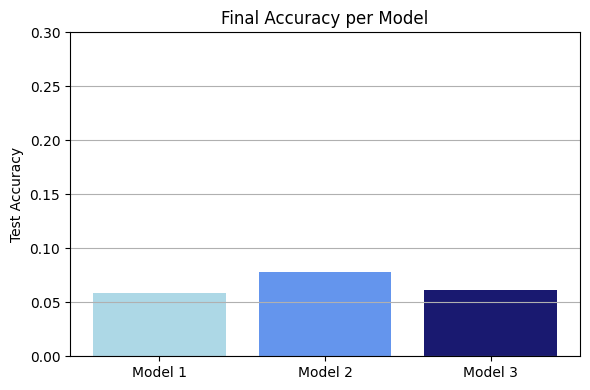

In [5]:
import matplotlib.pyplot as plt

# Final test accuracy for each model
accuracies = [0.0588, 0.0784, 0.0610]
models = ['Model 1', 'Model 2', 'Model 3']

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightblue', 'cornflowerblue','midnightblue' ])
plt.ylim(0, 0.3)
plt.ylabel("Test Accuracy")
plt.title("Final Accuracy per Model")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Class imbalanced solved with weights

In this section, we prepare the HMDB51 video dataset for training a deep learning model. Since videos can be very large and vary in length, we extract a fixed number of frames uniformly sampled from each video and apply common image transformations such as resizing and normalization.

To handle potential class imbalance and limit computational load, we cap the number of videos per class to a maximum (e.g., 30). Then, we split the resulting dataset into training and validation subsets for model evaluation.

Finally, we create PyTorch DataLoaders for efficient batch loading during training, and compute class weights to address imbalance when optimizing the model. This setup ensures a balanced, manageable, and standardized dataset ready for deep video analysis.

In [10]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image


class VideoDataset(Dataset):
    def __init__(self, root_dir, frames_per_video=8, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.frames_per_video = frames_per_video
        self.video_paths = []
        self.labels = []
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(sorted(os.listdir(root_dir)))}

        for class_name, idx in self.class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            for fname in os.listdir(class_dir):
                if fname.endswith(".avi"):
                    self.video_paths.append(os.path.join(class_dir, fname))
                    self.labels.append(idx)

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        path = self.video_paths[idx]
        label = self.labels[idx]

        frames = self.extract_frames(path)
        return torch.stack(frames), label

    def extract_frames(self, video_path):
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_idxs = np.linspace(0, frame_count - 1, self.frames_per_video).astype(int)

        frames = []
        for fid in frame_idxs:
            cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = Image.fromarray(frame)
            if self.transform:
                frame = self.transform(frame)
            frames.append(frame)

        cap.release()

        # Pad if too few frames
        while len(frames) < self.frames_per_video:
            frames.append(frames[-1].clone())

        return frames


In [12]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import random
from collections import defaultdict
import random

SEED = 42
torch.manual_seed(SEED)      # Ensures reproducible behavior in PyTorch
random.seed(SEED)

# Dataset path and number of frames to sample per video
base_path = dataset_path  # or base_dir
SAMPLED_NUM_FRAMES = 8

# Define image transformations to apply on each frame:
# - Resize frames to 224x224 (common input size for CNNs)
# - Convert frames to tensors
# - Normalize using ImageNet mean and std for better training stability
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 1. Create the full dataset using the VideoDataset class
#    This dataset loads videos, samples frames, applies transforms, and stores labels
full_dataset = VideoDataset(base_path, frames_per_video=SAMPLED_NUM_FRAMES, transform=transform)

# 2. Define a function to limit the number of videos per class to max_per_class
#    This helps reduce dataset size and balance the number of samples per class
def limit_videos_per_class_random(dataset, max_per_class=30):
    class_to_indices = defaultdict(list)

    # Group dataset indices by class label
    for idx, label in enumerate(dataset.labels):
        class_to_indices[label].append(idx)

    selected_indices = []

    # For each class, shuffle indices and pick at most max_per_class videos
    for label, indices in class_to_indices.items():
        random.shuffle(indices)
        selected_indices.extend(indices[:max_per_class])

    # Shuffle the combined list of selected indices to mix classes
    random.shuffle(selected_indices)

    # Create a new VideoDataset instance manually
    limited_dataset = VideoDataset.__new__(VideoDataset)
    limited_dataset.video_paths = [dataset.video_paths[i] for i in selected_indices]
    limited_dataset.labels = [dataset.labels[i] for i in selected_indices]
    limited_dataset.class_to_idx = dataset.class_to_idx
    limited_dataset.transform = dataset.transform
    limited_dataset.frames_per_video = dataset.frames_per_video

    return limited_dataset

# Apply the filtering function to limit the dataset size
limited_dataset = limit_videos_per_class_random(full_dataset, max_per_class=30)
print(f"Limited dataset size: {len(limited_dataset)} samples")

# 3. Split the limited dataset into training and validation sets
val_size = int(0.3 * len(limited_dataset))  # 30% for validation
train_size = len(limited_dataset) - val_size  # 70% for training

train_dataset, val_dataset = random_split(limited_dataset, [train_size, val_size])

# 4. Create DataLoaders for batch loading during training and validation
#    - batch_size=2: load 2 videos per batch
#    - shuffle training data to help model generalization
#    - num_workers=2 to use parallel data loading (adjust based on your system)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=2)

# 5. Compute class weights for the training set to handle class imbalance
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Extract labels corresponding to training indices
train_labels = [limited_dataset.labels[i] for i in train_dataset.indices]

# Compute balanced class weights (higher weight for less frequent classes)
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)

# Convert class weights to a PyTorch tensor for use in loss functions
class_weights = torch.tensor(class_weights, dtype=torch.float)


Limited dataset size: 1530 samples


Now, we define three different models, with are equal to the previous ones and we check if weight helps not only to balance the classes but also to improve the training.

In [13]:
#model 1
import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 112x112

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 56x56

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # Output: (B, 128, 1, 1)
        )

        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):  # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Merge batch and time for CNN
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Reshape back for LSTM
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])        # Use last LSTM layer's output
        return out
model1w=CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model1w.state_dict(), "cnn_lstm_model1w.pth")

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model1w = CNN_LSTM_VideoClassifier(num_classes=51)
model1w.load_state_dict(torch.load("cnn_lstm_model1w.pth"))
model1w.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1w.parameters(), lr=1e-4)

num_epochs = 10

losses1w=[]
for epoch in range(num_epochs):
    model1w.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)             # (B, T, C, H, W)
        labels = labels.to(device).long()      # (B,)

        optimizer.zero_grad()
        outputs = model1w(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses1w.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.9157
Epoch [2/10], Loss: 3.7848
Epoch [3/10], Loss: 3.7335
Epoch [4/10], Loss: 3.7056
Epoch [5/10], Loss: 3.6697
Epoch [6/10], Loss: 3.6328
Epoch [7/10], Loss: 3.5902
Epoch [8/10], Loss: 3.5656
Epoch [9/10], Loss: 3.5204
Epoch [10/10], Loss: 3.4833


In [15]:
model1w.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model1w(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 6.10%


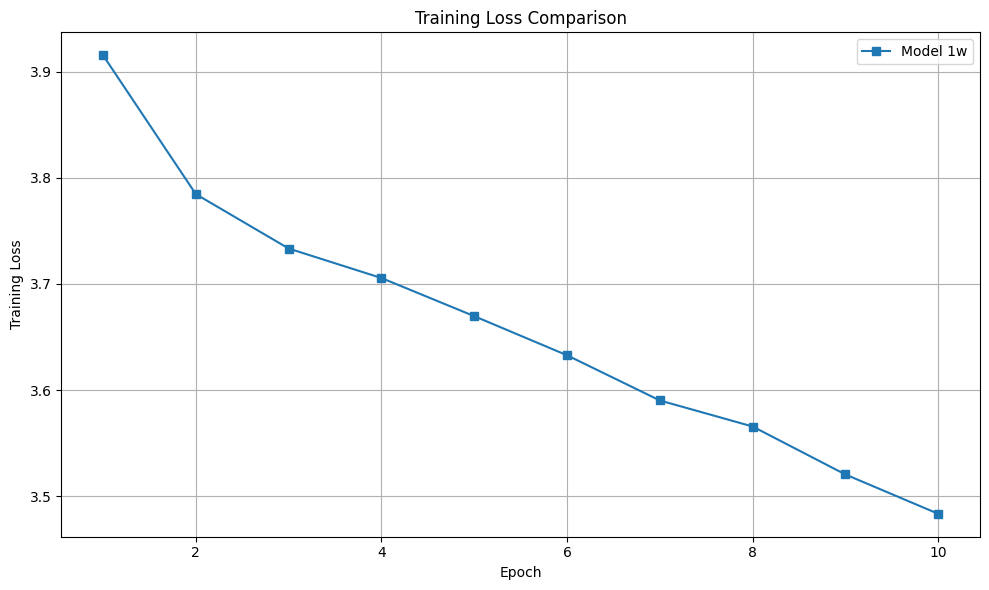

In [17]:
# Plot training loss
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses1w, label='Model 1w', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
#Model 2

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 112x112

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 56x56

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(),
    nn.AdaptiveAvgPool2d((1, 1))  # (B, 128, 1, 1)
)
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):  # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Merge batch and time for CNN
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Reshape back for LSTM
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])        # Use last LSTM layer's output
        return out
model2w=CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model2w.state_dict(), "cnn_lstm_model2w.pth")

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model2w = CNN_LSTM_VideoClassifier(num_classes=51)
model2w.load_state_dict(torch.load("cnn_lstm_model2w.pth"))
model2w.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2w.parameters(), lr=1e-4)

num_epochs = 10

losses2w=[]
for epoch in range(num_epochs):
    model2w.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)             # (B, T, C, H, W)
        labels = labels.to(device).long()      # (B,)

        optimizer.zero_grad()
        outputs = model2w(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses2w.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
#This model result as the best one, we want to explore the summary of the parameters

Epoch [1/10], Loss: 3.9209
Epoch [2/10], Loss: 3.8494
Epoch [3/10], Loss: 3.7850
Epoch [4/10], Loss: 3.7413
Epoch [5/10], Loss: 3.6730
Epoch [6/10], Loss: 3.6698
Epoch [7/10], Loss: 3.6354
Epoch [8/10], Loss: 3.6246
Epoch [9/10], Loss: 3.6184
Epoch [10/10], Loss: 3.5855


In [20]:
# Calculate the total number of parameters in the model
total_params = sum(p.numel() for p in model2w.parameters())

# Calculate the number of trainable parameters (those with requires_grad=True)
trainable_params = sum(p.numel() for p in model2w.parameters() if p.requires_grad)

# Print the results
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")


Total parameters: 502067
Trainable parameters: 502067


In [21]:
model2w.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model2w(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 6.32%


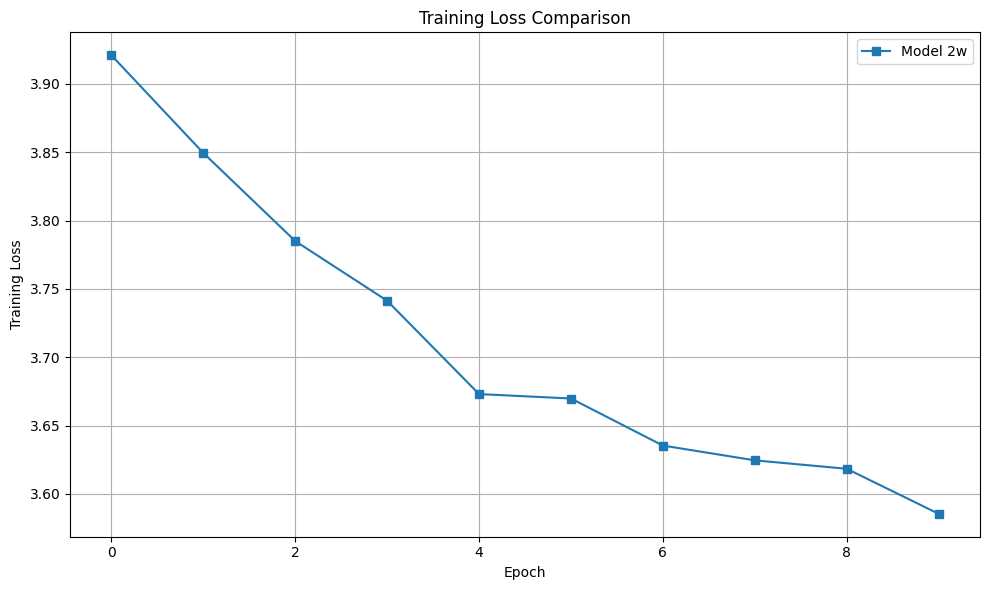

In [22]:
import matplotlib.pyplot as plt

epochs = list(range(len(losses2w)))

# Plot training loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, losses2w, label='Model 2w', marker='s')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#Model 3

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.Dropout2d(0.2),
    nn.Conv2d(32, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 112x112

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.Dropout2d(0.3),
    nn.Conv2d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 56x56

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(),
    nn.AdaptiveAvgPool2d((1, 1))  # (B, 128, 1, 1)
)

        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):  # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Merge batch and time for CNN
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Reshape back for LSTM
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])        # Use last LSTM layer's output
        return out
model3w=CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model3w.state_dict(), "cnn_lstm_model3w.pth")

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model3w = CNN_LSTM_VideoClassifier(num_classes=51)
model3w.load_state_dict(torch.load("cnn_lstm_model3w.pth"))
model3w.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3w.parameters(), lr=1e-4)

num_epochs = 10

losses3w=[]
for epoch in range(num_epochs):
    model3w.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)             # (B, T, C, H, W)
        labels = labels.to(device).long()      # (B,)

        optimizer.zero_grad()
        outputs = model3w(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses3w.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.9280
Epoch [2/10], Loss: 3.8717
Epoch [3/10], Loss: 3.8345
Epoch [4/10], Loss: 3.7843
Epoch [5/10], Loss: 3.7661
Epoch [6/10], Loss: 3.7196
Epoch [7/10], Loss: 3.7279
Epoch [8/10], Loss: 3.6953
Epoch [9/10], Loss: 3.7014
Epoch [10/10], Loss: 3.6651


In [25]:
model3w.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model3w(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 6.32%


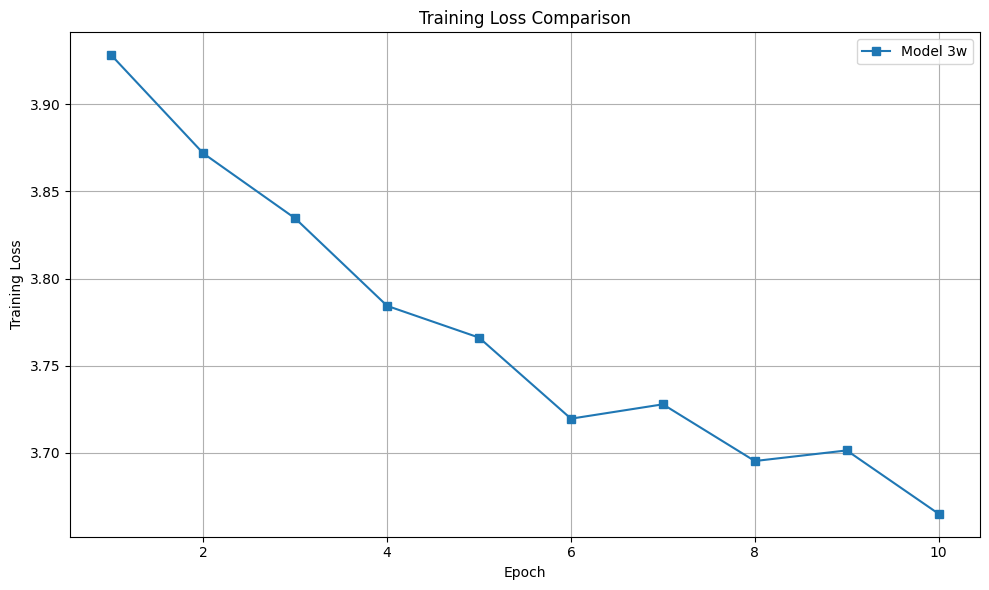

In [26]:
# Plot training loss

import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses3w, label='Model 3w', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

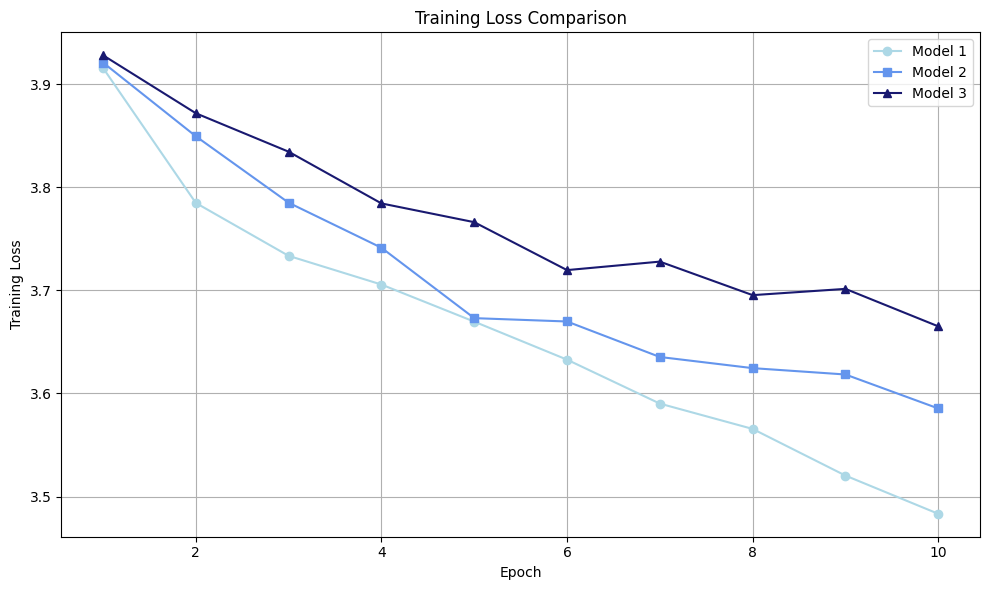

In [27]:
# Plot training loss

import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses1w, label='Model 1', marker='o',color='lightblue')
plt.plot(epochs, losses2w, label='Model 2', marker='s', color='cornflowerblue')
plt.plot(epochs, losses3w, label='Model 3', marker='^',color='midnightblue')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

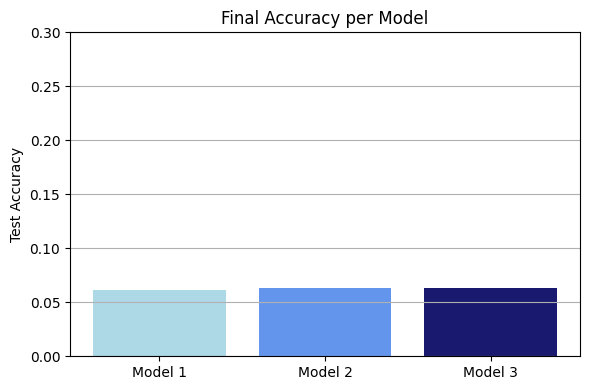

In [5]:
import matplotlib.pyplot as plt
# Final test accuracy for each model
accuracies = [0.061, 0.0632, 0.063]
models = ['Model 1', 'Model 2', 'Model 3']

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightblue', 'cornflowerblue','midnightblue' ])
plt.ylim(0, 0.3)
plt.ylabel("Test Accuracy")
plt.title("Final Accuracy per Model")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Data Augmentation

This code implements a full pipeline for video classification using PyTorch. It processes videos by sampling a fixed number of frames, applies data augmentation transforms, and loads the data with PyTorch’s DataLoader. A CNN-LSTM hybrid model is defined to extract spatial features from frames and capture temporal dependencies across frames. The dataset is limited to a maximum number of videos per class to balance classes, and the model is trained for multiple epochs with cross-entropy loss.

The key components include:

- Frame Sampling: Extracts uniformly spaced frames from each video, padding if necessary.

- Custom Dataset: Loads videos and their labels with optional frame-level transforms.

- Data Augmentation: Includes flips, rotations, and color jitter for training.

- Balanced Dataset: Limits videos per class to prevent class imbalance.

- Model Architecture: A small CNN extracts spatial features per frame, feeding into an LSTM to model temporal dynamics.

- Training Loop: Optimizes the model using Adam and cross-entropy loss on GPU if available.

As regards data augmentation,it is applied through the train_transform pipeline using torchvision transforms:

1. RandomHorizontalFlip — randomly flips frames horizontally, simulating mirrored actions.

2. RandomRotation — randomly rotates frames by up to ±10 degrees, adding rotation invariance.

3. ColorJitter — randomly changes brightness, contrast, and saturation, helping the model be robust to lighting changes.

These augmentations are only applied during training and help the model learn more generalized features by exposing it to varied versions of the input data.

In [6]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2
import random
from collections import defaultdict
import torch.nn as nn

#Set random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Frame Sampling Function
def sample_frames(video_path, num_frames=16, transform=None):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Sample `num_frames` evenly spaced indices over the video duration
    indices = np.linspace(0, max(total_frames - 1, 0), num_frames).astype(int)
    frames = []

    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret:
            continue
        # Convert BGR (OpenCV) to RGB (PIL)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = Image.fromarray(frame)
        if transform:
            frame = transform(frame)
        frames.append(frame)

    cap.release()

    # Pad with last frame if video has fewer frames than num_frames
    if len(frames) < num_frames:
        last = frames[-1] if frames else torch.zeros(3, 224, 224)
        while len(frames) < num_frames:
            frames.append(last.clone())

    # Return tensor shaped (T, C, H, W)
    return torch.stack(frames)

#  Dataset Class
class VideoDataset(Dataset):
    def __init__(self, base_dir, num_frames=16, transform=None):
        self.samples = []    # List of video file paths
        self.labels = []     # Corresponding labels (class indices)
        self.label2idx = {}  # Map class names to indices
        self.transform = transform
        self.num_frames = num_frames

        # Populate samples and labels by reading directories
        for idx, class_name in enumerate(sorted(os.listdir(base_dir))):
            class_dir = os.path.join(base_dir, class_name)
            if os.path.isdir(class_dir):
                self.label2idx[class_name] = idx
                for fname in os.listdir(class_dir):
                    if fname.endswith('.avi'):
                        self.samples.append(os.path.join(class_dir, fname))
                        self.labels.append(idx)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        video_path = self.samples[idx]
        label = self.labels[idx]
        video = sample_frames(video_path, self.num_frames, self.transform)
        return video, label

#Transformations
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

#Limit number of videos per class to max_per_class
def limit_videos_per_class(dataset, max_per_class=30):
    class_to_indices = defaultdict(list)
    for idx in range(len(dataset)):
        label = dataset.labels[idx]
        class_to_indices[label].append(idx)

    selected_indices = []
    for idxs in class_to_indices.values():
        # Randomly sample max_per_class videos per class
        selected_indices.extend(random.sample(idxs, min(len(idxs), max_per_class)))

    return Subset(dataset, selected_indices)

# --- Dataset and DataLoader setup ---
base_dir = dataset_path  # Define your dataset path here

full_dataset = VideoDataset(base_dir=base_dir, num_frames=16, transform=train_transform)
limited_dataset = limit_videos_per_class(full_dataset, max_per_class=30)

val_size = int(0.3 * len(limited_dataset))  # 30% validation
train_size = len(limited_dataset) - val_size

train_subset, val_subset = random_split(limited_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size=2, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset, batch_size=2, shuffle=False, num_workers=2)

# Model Definition
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # Output: (B*T, 128, 1, 1)
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)  # Combine batch and time dims
        x = self.cnn(x)
        x = x.view(B, T, -1)        # Reshape to (B, T, feature_dim)
        _, (hn, _) = self.lstm(x)   # Use last hidden state
        out = self.fc(hn[-1])
        return out

model1a = CNN_LSTM_VideoClassifier(num_classes=51).to(device)
torch.save(model1a.state_dict(), "cnn_lstm_model1a.pth")

# --- Training Setup ---
model1a.load_state_dict(torch.load("cnn_lstm_model1a.pth"))
model1a.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1a.parameters(), lr=1e-4)

num_epochs = 10
losses1a = []

for epoch in range(num_epochs):
    model1a.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)
        labels = labels.to(device).long()

        optimizer.zero_grad()
        outputs = model1a(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses1a.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.9253
Epoch [2/10], Loss: 3.8138
Epoch [3/10], Loss: 3.7712
Epoch [4/10], Loss: 3.7321
Epoch [5/10], Loss: 3.6867
Epoch [6/10], Loss: 3.6371
Epoch [7/10], Loss: 3.5913
Epoch [8/10], Loss: 3.5348
Epoch [9/10], Loss: 3.4936
Epoch [10/10], Loss: 3.4496


In [7]:
model1a.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model1a(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 6.54%


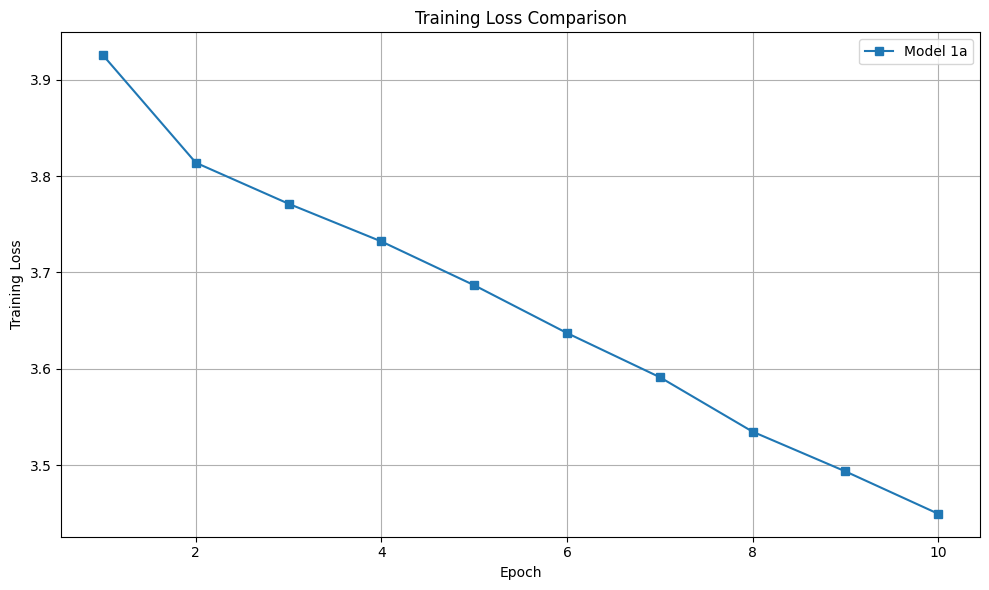

In [8]:
# Plot training loss
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses1a, label='Model 1a', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
#Model 2

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 112x112

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 56x56

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(),
    nn.AdaptiveAvgPool2d((1, 1))  # (B, 128, 1, 1)
)
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):  # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Merge batch and time for CNN
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Reshape back for LSTM
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])        # Use last LSTM layer's output
        return out
model2a=CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model2a.state_dict(), "cnn_lstm_model2a.pth")

#training
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2a = CNN_LSTM_VideoClassifier(num_classes=51).to(device)
model2a.load_state_dict(torch.load("cnn_lstm_model2a.pth"))
model2a.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2a.parameters(), lr=1e-4)

num_epochs = 10
losses2a = []

for epoch in range(num_epochs):
    model2a.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)
        labels = labels.to(device).long()

        optimizer.zero_grad()
        outputs = model2a(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses2a.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")




Epoch [1/10], Loss: 3.9171
Epoch [2/10], Loss: 3.8583
Epoch [3/10], Loss: 3.8054
Epoch [4/10], Loss: 3.7674
Epoch [5/10], Loss: 3.7236
Epoch [6/10], Loss: 3.6885
Epoch [7/10], Loss: 3.6788
Epoch [8/10], Loss: 3.6341
Epoch [9/10], Loss: 3.6296
Epoch [10/10], Loss: 3.6009


In [10]:
model2a.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model2a(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * (correct / total):.2f}%")

Validation Accuracy: 6.54%


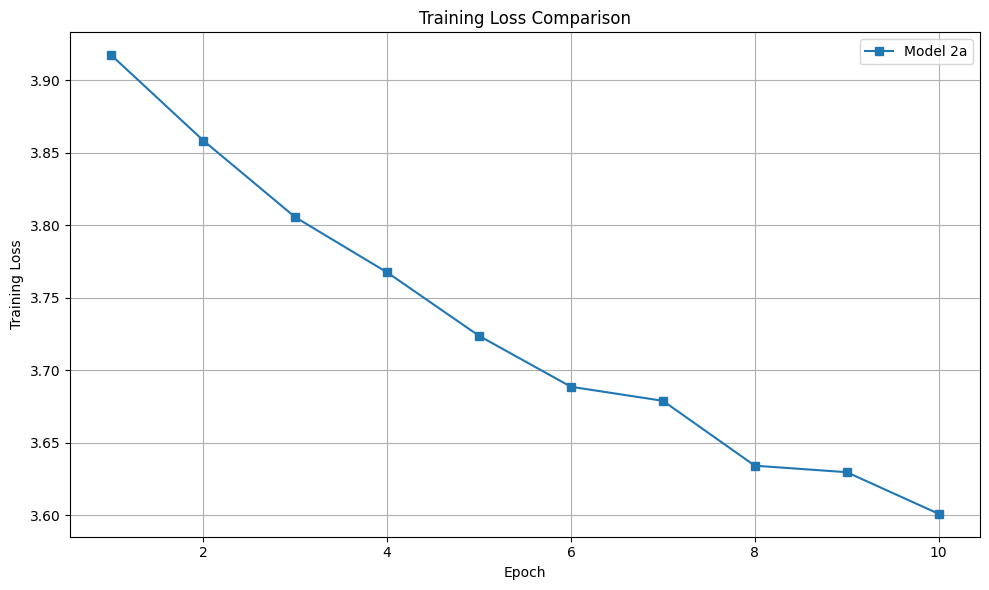

In [11]:
# Plot training loss
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses2a, label='Model 2a', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
#Model 3

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.Dropout2d(0.2),
    nn.Conv2d(32, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 112x112

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.Dropout2d(0.3),
    nn.Conv2d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 56x56

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(),
    nn.AdaptiveAvgPool2d((1, 1))  # (B, 128, 1, 1)
)

        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):  # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Merge batch and time for CNN
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Reshape back for LSTM
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])        # Use last LSTM layer's output
        return out
model3a=CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model3a.state_dict(), "cnn_lstm_model3a.pth")

#training
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3a = CNN_LSTM_VideoClassifier(num_classes=51).to(device)
model3a.load_state_dict(torch.load("cnn_lstm_model3a.pth"))
model3a.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3a.parameters(), lr=1e-4)

num_epochs = 10
losses3a = []

for epoch in range(num_epochs):
    model3a.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)
        labels = labels.to(device).long()

        optimizer.zero_grad()
        outputs = model3a(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses3a.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")



Epoch [1/10], Loss: 3.9322
Epoch [2/10], Loss: 3.8677
Epoch [3/10], Loss: 3.8268
Epoch [4/10], Loss: 3.8101
Epoch [5/10], Loss: 3.7621
Epoch [6/10], Loss: 3.7150
Epoch [7/10], Loss: 3.7294
Epoch [8/10], Loss: 3.7225
Epoch [9/10], Loss: 3.6790
Epoch [10/10], Loss: 3.6493


In [13]:
model3a.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model3a(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 8.50%


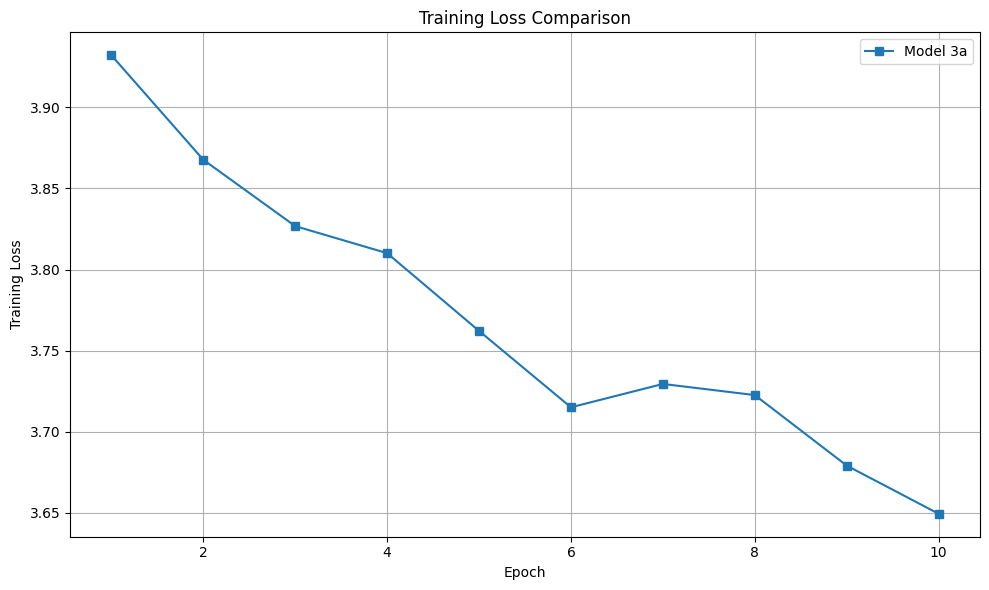

In [14]:
# Plot training loss
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses3a, label='Model 3a', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

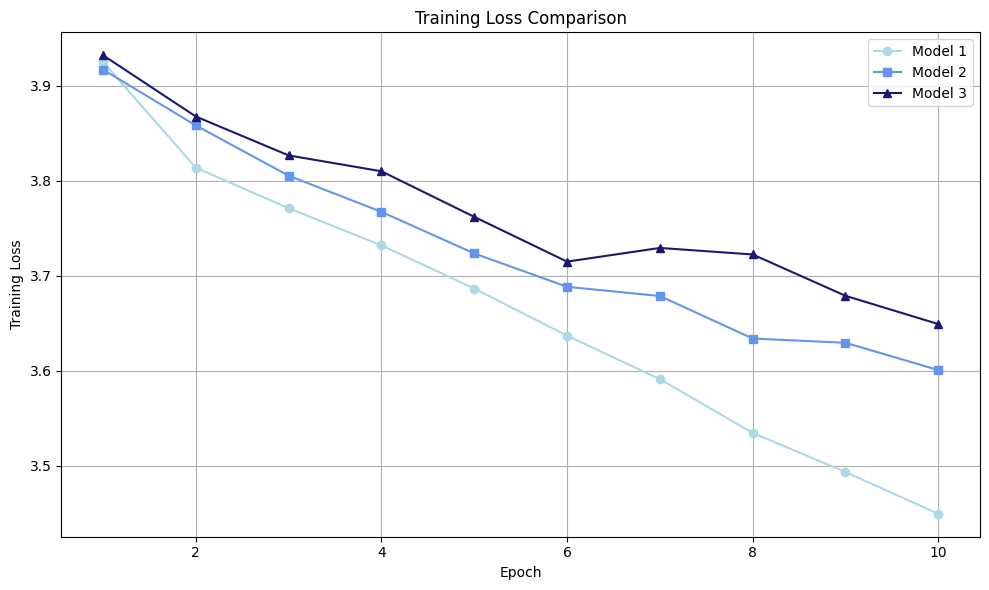

In [15]:
# Plot training loss summary
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses1a, label='Model 1', marker='o',color='lightblue')
plt.plot(epochs, losses2a, label='Model 2', marker='s', color='cornflowerblue')
plt.plot(epochs, losses3a, label='Model 3', marker='^',color='midnightblue')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

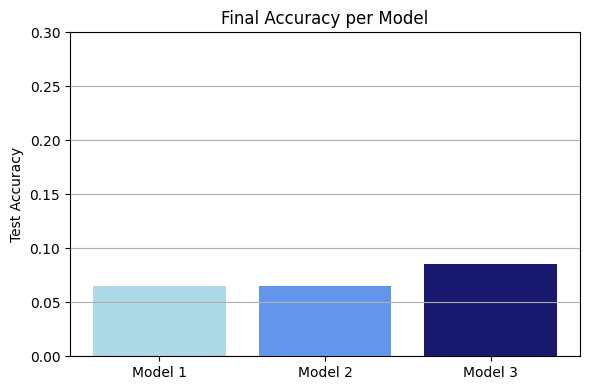

In [16]:
# Final test accuracy for each model
accuracies = [0.0654, 0.0654, 0.085]
models = ['Model 1', 'Model 2', 'Model 3']

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightblue', 'cornflowerblue','midnightblue' ])
plt.ylim(0, 0.3)
plt.ylabel("Test Accuracy")
plt.title("Final Accuracy per Model")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#DROPOUT

In this section we will apply dropout to all the architectures. *Dropout* is a regularization technique used in neural networks to prevent overfitting by randomly "dropping out" (i.e., setting to zero) a fraction of the neurons during training. This forces the network to not rely too heavily on any single neuron and promotes better generalization.
This script provides a complete pipeline to prepare and load video data for deep learning tasks using PyTorch. It focuses on:

- Frame Sampling: Extracting a fixed number of frames uniformly from each video to standardize input length.

- Custom Dataset: A VideoDataset class to load videos and their labels, applying transforms to each frame.

- Data Limiting: Restricting the number of videos per class to avoid class imbalance.

- Train/Validation Split: Randomly splitting the dataset into training and validation sets.

- DataLoaders: Efficient batching and shuffling of data during training and evaluation.

This pipeline is especially useful for video classification problems where videos may have varying lengths and need to be processed consistently.


In [17]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2
base_dir=dataset_path
# --- 1. Frame Sampling Function ---
def sample_frames(video_path, num_frames=16, transform=None):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    indices = np.linspace(0, max(total_frames - 1, 0), num_frames).astype(int)
    frames = []

    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret:
            continue
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = Image.fromarray(frame)
        if transform:
            frame = transform(frame)
        frames.append(frame)

    cap.release()
    if len(frames) < num_frames:
        last = frames[-1] if frames else torch.zeros(3, 224, 224)
        while len(frames) < num_frames:
            frames.append(last.clone())

    return torch.stack(frames)

# --- 2. Dataset ---
class VideoDataset(Dataset):
    def __init__(self, base_dir, num_frames=16, transform=None):
        self.samples = []
        self.labels = []
        self.label2idx = {}
        self.transform = transform
        self.num_frames = num_frames

        for idx, class_name in enumerate(sorted(os.listdir(base_dir))):
            class_dir = os.path.join(base_dir, class_name)
            if os.path.isdir(class_dir):
                self.label2idx[class_name] = idx
                for fname in os.listdir(class_dir):
                    if fname.endswith('.avi'):
                        self.samples.append(os.path.join(class_dir, fname))
                        self.labels.append(idx)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        video_path = self.samples[idx]
        label = self.labels[idx]
        video = sample_frames(video_path, self.num_frames, self.transform)
        return video, label



In [18]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import random
from collections import defaultdict

# Dataset path and transform
base_path = dataset_path  # or base_dir
SAMPLED_NUM_FRAMES = 8

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 1. Create full dataset
full_dataset = VideoDataset(base_path, num_frames=SAMPLED_NUM_FRAMES, transform=transform)

# 2. Filter to max 30 videos per class
def limit_videos_per_class_random(dataset, max_per_class=30):
    class_to_indices = defaultdict(list)
    for idx, label in enumerate(dataset.labels):
        class_to_indices[label].append(idx)

    selected_indices = []
    for label, indices in class_to_indices.items():
        random.shuffle(indices)
        selected_indices.extend(indices[:max_per_class])

    random.shuffle(selected_indices)

    # Create limited dataset object
    limited_dataset = VideoDataset.__new__(VideoDataset)
    limited_dataset.samples = [dataset.samples[i] for i in selected_indices]
    limited_dataset.labels = [dataset.labels[i] for i in selected_indices]
    limited_dataset.label2idx = dataset.label2idx
    limited_dataset.transform = dataset.transform
    limited_dataset.num_frames = dataset.num_frames

    return limited_dataset

limited_dataset = limit_videos_per_class_random(full_dataset, max_per_class=30)
print(f"Limited dataset size: {len(limited_dataset)} samples")

# 3. Split into train and val
val_size = int(0.3 * len(limited_dataset))
train_size = len(limited_dataset) - val_size

train_dataset, val_dataset = random_split(limited_dataset, [train_size, val_size])

# 4. DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=2)


Limited dataset size: 1530 samples


This code implements a CNN-LSTM-based video classifier that processes short clips of video frames and predicts a class label. The CNN extracts spatial features from individual frames, while the LSTM models temporal relationships across frames.

A key addition here is the use of dropout, which helps prevent overfitting:

Dropout is used within the LSTM (if num_layers > 1) and after feature extraction, before the final fully connected (FC) classification layer.

This technique helps regularize the model and improves generalization to unseen data.

In [19]:
# Model
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1, dropout_prob=0.3):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_dim, num_layers=num_layers,
                            batch_first=True, dropout=dropout_prob if num_layers > 1 else 0)
                            # Dropout only applies if layers > 1

        self.dropout = nn.Dropout(p=0.3)  # Regularization dropout before FC layer
        self.fc = nn.Linear(hidden_dim, num_classes) # Final classification layer
    def forward(self, x):
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)
        x = self.cnn(x)
        x = x.view(B, T, -1)
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])
        return out
model1d = CNN_LSTM_VideoClassifier(num_classes=51).to(device)
torch.save(model1d.state_dict(), "cnn_lstm_model1d.pth")
# --- Training ---
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1d = CNN_LSTM_VideoClassifier(num_classes=51).to(device)
model1d.load_state_dict(torch.load("cnn_lstm_model1d.pth"))
model1d.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1d.parameters(), lr=1e-4)

num_epochs = 10
losses1d = []

for epoch in range(num_epochs):
    model1d.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)
        labels = labels.to(device).long()

        optimizer.zero_grad()
        outputs = model1d(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses1d.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")




Epoch [1/10], Loss: 3.9061
Epoch [2/10], Loss: 3.7595
Epoch [3/10], Loss: 3.6970
Epoch [4/10], Loss: 3.6276
Epoch [5/10], Loss: 3.5656
Epoch [6/10], Loss: 3.5163
Epoch [7/10], Loss: 3.4794
Epoch [8/10], Loss: 3.4430
Epoch [9/10], Loss: 3.4094
Epoch [10/10], Loss: 3.3700


In [20]:
model1d.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model1d(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 6.54%


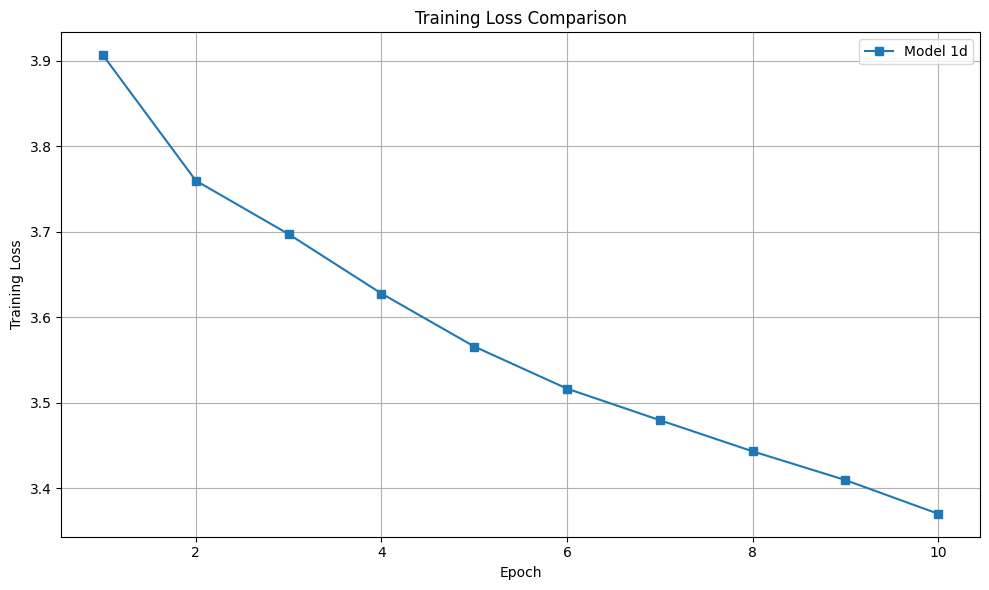

In [21]:
# Plot training loss
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses1d, label='Model 1d', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#Model 2

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1,dropout_prob=0.3):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 112x112

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 56x56

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(),
    nn.AdaptiveAvgPool2d((1, 1))  # (B, 128, 1, 1)
)
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_dim,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=dropout_prob if num_layers > 1 else 0)

        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(hidden_dim, num_classes)


    def forward(self, x):  # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Merge batch and time for CNN
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Reshape back for LSTM
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])        # Use last LSTM layer's output
        return out
model2d=CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model2d.state_dict(), "cnn_lstm_model2d.pth")

#training
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2d = CNN_LSTM_VideoClassifier(num_classes=51).to(device)
model2d.load_state_dict(torch.load("cnn_lstm_model2d.pth"))
model2d.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2d.parameters(), lr=1e-4)

num_epochs = 10
losses2d = []

for epoch in range(num_epochs):
    model2d.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)
        labels = labels.to(device).long()

        optimizer.zero_grad()
        outputs = model2d(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses2d.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.9170
Epoch [2/10], Loss: 3.8284
Epoch [3/10], Loss: 3.7647
Epoch [4/10], Loss: 3.6978
Epoch [5/10], Loss: 3.6875
Epoch [6/10], Loss: 3.6482
Epoch [7/10], Loss: 3.6218
Epoch [8/10], Loss: 3.6033
Epoch [9/10], Loss: 3.5763
Epoch [10/10], Loss: 3.5901


In [23]:
model2d.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model2d(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 6.32%


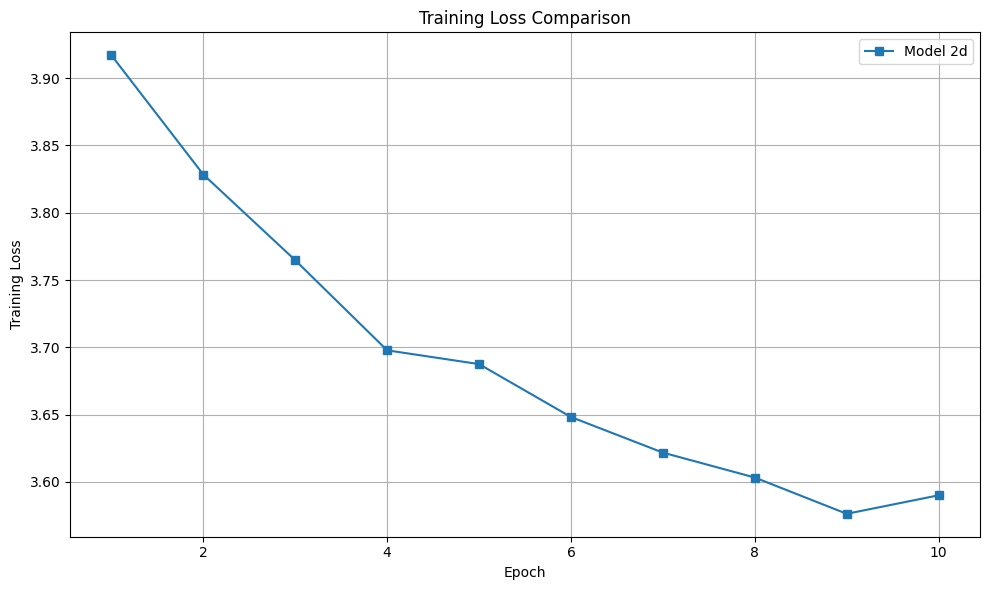

In [24]:
# Plot training loss
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses2d, label='Model 2d', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
#Model 3

import torch
import torch.nn as nn

class CNN_LSTM_VideoClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=256, num_layers=1,dropout_prob=0.3):
        super(CNN_LSTM_VideoClassifier, self).__init__()

        self.cnn = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.Dropout2d(0.2),
    nn.Conv2d(32, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 112x112

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.Dropout2d(0.3),
    nn.Conv2d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),  # 56x56

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(),
    nn.AdaptiveAvgPool2d((1, 1))  # (B, 128, 1, 1)
)

        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_dim,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=dropout_prob if num_layers > 1 else 0)

        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):  # x: (B, T, C, H, W)
        B, T, C, H, W = x.size()
        x = x.view(B * T, C, H, W)   # Merge batch and time for CNN
        x = self.cnn(x)
        x = x.view(B, T, -1)         # Reshape back for LSTM
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])        # Use last LSTM layer's output
        return out
model3d=CNN_LSTM_VideoClassifier(num_classes=51)
torch.save(model3d.state_dict(), "cnn_lstm_model3d.pth")

#training
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3d = CNN_LSTM_VideoClassifier(num_classes=51).to(device)
model3d.load_state_dict(torch.load("cnn_lstm_model3d.pth"))
model3d.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3d.parameters(), lr=1e-4)

num_epochs = 10
losses3d = []

for epoch in range(num_epochs):
    model3d.train()
    running_loss = 0.0

    for frames, labels in train_loader:
        frames = frames.to(device)
        labels = labels.to(device).long()

        optimizer.zero_grad()
        outputs = model3d(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses3d.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")



Epoch [1/10], Loss: 3.9259
Epoch [2/10], Loss: 3.8748
Epoch [3/10], Loss: 3.8348
Epoch [4/10], Loss: 3.7814
Epoch [5/10], Loss: 3.7440
Epoch [6/10], Loss: 3.7384
Epoch [7/10], Loss: 3.6832
Epoch [8/10], Loss: 3.6881
Epoch [9/10], Loss: 3.6587
Epoch [10/10], Loss: 3.6542


In [26]:
model3d.eval()
correct, total = 0, 0
with torch.no_grad():
    for frames, labels in val_loader:
        frames = frames.to(device)
        labels = labels.to(device)
        outputs = model3d(frames)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 5.01%


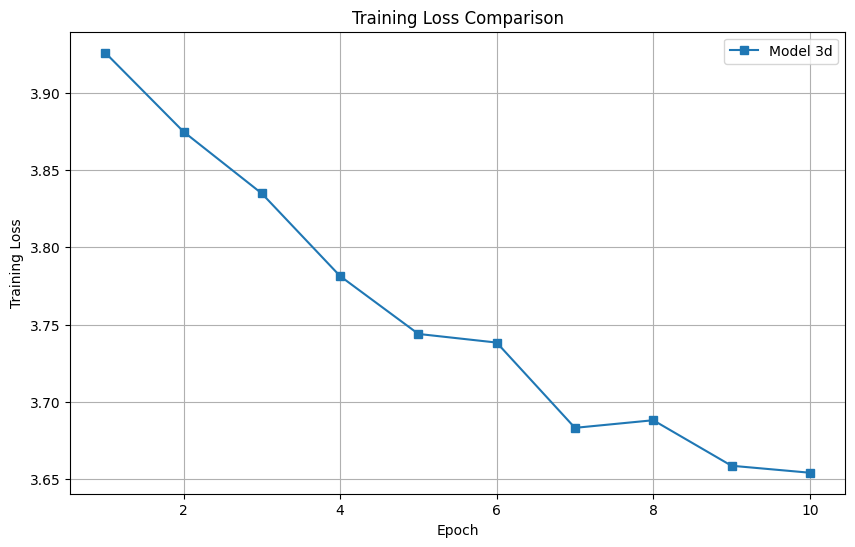

In [27]:
# Plot training loss
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

plt.figure(figsize=(10, 6))

plt.plot(epochs, losses3d, label='Model 3d', marker='s')


plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)

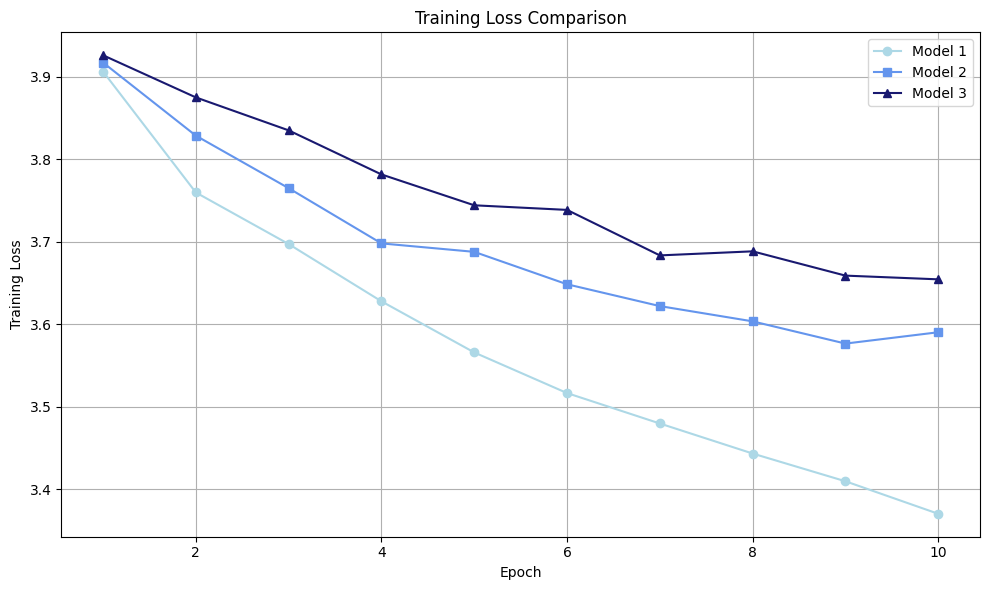

In [28]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses1d, label='Model 1', marker='o',color='lightblue')
plt.plot(epochs, losses2d, label='Model 2', marker='s', color='cornflowerblue')
plt.plot(epochs, losses3d, label='Model 3', marker='^',color='midnightblue')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


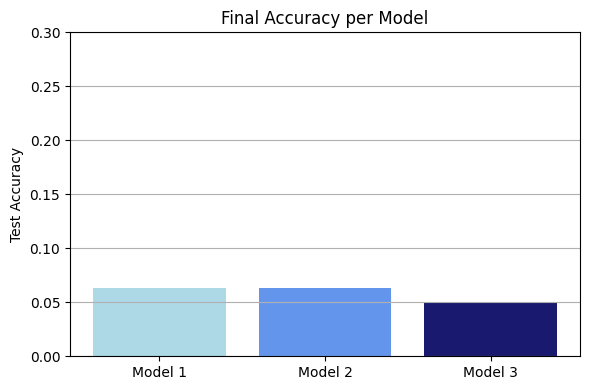

In [30]:
# Final test accuracy for each model
accuracies = [0.0632, 0.0632, 0.0501]
models = ['Model 1', 'Model 2', 'Model 3']

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightblue', 'cornflowerblue','midnightblue' ])
plt.ylim(0, 0.3)
plt.ylabel("Test Accuracy")
plt.title("Final Accuracy per Model")
plt.grid(axis='y')
plt.tight_layout()
plt.show()